In [1]:
import os
import numpy as np
import random 
import shutil
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import shutil
from sklearn.model_selection import train_test_split
import seaborn as sns
from PIL import Image
import rasterio
from rasterio.windows import Window
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.python.keras.models import Sequential
from matplotlib.pyplot import figure
from tensorflow.keras.models import save_model
import cv2
import glob
figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [6]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

In [35]:
train_data_dir = './eurosat'

In [36]:
data = {}
img_height, img_width = 0, 0

In [37]:
for path, dirs, files in os.walk(train_data_dir):
    print(path)
    print(dirs)
    print(files)
    dir_name = path.split('/')[-1]
    first_file = files[0]
    file_name, file_ext = first_file.split('.')
    if file_ext == 'tif':
        image = Image.open(f'{path}/{first_file}')
        img_width, img_height = image.size
        data[dir_name] = {'count': len(files), 'height': img_height, 'width': img_width}

./eurosat
['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'rgb', 'River', 'SeaLake']
['label_map.json', 'test.csv', 'train.csv', 'validation.csv']
./eurosat\AnnualCrop
[]
['AnnualCrop_1.jpg', 'AnnualCrop_10.jpg', 'AnnualCrop_100.jpg', 'AnnualCrop_1000.jpg', 'AnnualCrop_1001.jpg', 'AnnualCrop_1002.jpg', 'AnnualCrop_1003.jpg', 'AnnualCrop_1004.jpg', 'AnnualCrop_1005.jpg', 'AnnualCrop_1006.jpg', 'AnnualCrop_1007.jpg', 'AnnualCrop_1008.jpg', 'AnnualCrop_1009.jpg', 'AnnualCrop_101.jpg', 'AnnualCrop_1010.jpg', 'AnnualCrop_1011.jpg', 'AnnualCrop_1012.jpg', 'AnnualCrop_1013.jpg', 'AnnualCrop_1014.jpg', 'AnnualCrop_1015.jpg', 'AnnualCrop_1016.jpg', 'AnnualCrop_1017.jpg', 'AnnualCrop_1018.jpg', 'AnnualCrop_1019.jpg', 'AnnualCrop_102.jpg', 'AnnualCrop_1020.jpg', 'AnnualCrop_1021.jpg', 'AnnualCrop_1022.jpg', 'AnnualCrop_1023.jpg', 'AnnualCrop_1024.jpg', 'AnnualCrop_1025.jpg', 'AnnualCrop_1026.jpg', 'AnnualCrop_1027.jpg', 'AnnualC

IndexError: list index out of range

In [38]:
for path, dirs, files in os.walk(train_data_dir):
    if files:  # Check if the files list is not empty
        print(path)
        print(dirs)
        print(files)
        dir_name = path.split('/')[-1]
        first_file = files[0]
        file_name, file_ext = first_file.split('.')
        if file_ext == 'tif':
            image = Image.open(f'{path}/{first_file}')
            img_width, img_height = image.size
            data[dir_name] = {'count': len(files), 'height': img_height, 'width': img_width}

./eurosat
['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'rgb', 'River', 'SeaLake']
['label_map.json', 'test.csv', 'train.csv', 'validation.csv']
./eurosat\AnnualCrop
[]
['AnnualCrop_1.jpg', 'AnnualCrop_10.jpg', 'AnnualCrop_100.jpg', 'AnnualCrop_1000.jpg', 'AnnualCrop_1001.jpg', 'AnnualCrop_1002.jpg', 'AnnualCrop_1003.jpg', 'AnnualCrop_1004.jpg', 'AnnualCrop_1005.jpg', 'AnnualCrop_1006.jpg', 'AnnualCrop_1007.jpg', 'AnnualCrop_1008.jpg', 'AnnualCrop_1009.jpg', 'AnnualCrop_101.jpg', 'AnnualCrop_1010.jpg', 'AnnualCrop_1011.jpg', 'AnnualCrop_1012.jpg', 'AnnualCrop_1013.jpg', 'AnnualCrop_1014.jpg', 'AnnualCrop_1015.jpg', 'AnnualCrop_1016.jpg', 'AnnualCrop_1017.jpg', 'AnnualCrop_1018.jpg', 'AnnualCrop_1019.jpg', 'AnnualCrop_102.jpg', 'AnnualCrop_1020.jpg', 'AnnualCrop_1021.jpg', 'AnnualCrop_1022.jpg', 'AnnualCrop_1023.jpg', 'AnnualCrop_1024.jpg', 'AnnualCrop_1025.jpg', 'AnnualCrop_1026.jpg', 'AnnualCrop_1027.jpg', 'AnnualC

In [39]:
for path, dirs, files in os.walk(train_data_dir):
    if files:  # Check if the files list is not empty
        print(path)
        print(dirs)
        print(files)
        dir_name = path.split('/')[-1]
        for file_name in files:
            file_name, file_ext = file_name.split('.')
            if file_ext == 'tif':
                image = Image.open(f'{path}/{file_name}.{file_ext}')
                img_width, img_height = image.size
                data[dir_name] = {'count': len(files), 'height': img_height, 'width': img_width}

./eurosat
['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'rgb', 'River', 'SeaLake']
['label_map.json', 'test.csv', 'train.csv', 'validation.csv']
./eurosat\AnnualCrop
[]
['AnnualCrop_1.jpg', 'AnnualCrop_10.jpg', 'AnnualCrop_100.jpg', 'AnnualCrop_1000.jpg', 'AnnualCrop_1001.jpg', 'AnnualCrop_1002.jpg', 'AnnualCrop_1003.jpg', 'AnnualCrop_1004.jpg', 'AnnualCrop_1005.jpg', 'AnnualCrop_1006.jpg', 'AnnualCrop_1007.jpg', 'AnnualCrop_1008.jpg', 'AnnualCrop_1009.jpg', 'AnnualCrop_101.jpg', 'AnnualCrop_1010.jpg', 'AnnualCrop_1011.jpg', 'AnnualCrop_1012.jpg', 'AnnualCrop_1013.jpg', 'AnnualCrop_1014.jpg', 'AnnualCrop_1015.jpg', 'AnnualCrop_1016.jpg', 'AnnualCrop_1017.jpg', 'AnnualCrop_1018.jpg', 'AnnualCrop_1019.jpg', 'AnnualCrop_102.jpg', 'AnnualCrop_1020.jpg', 'AnnualCrop_1021.jpg', 'AnnualCrop_1022.jpg', 'AnnualCrop_1023.jpg', 'AnnualCrop_1024.jpg', 'AnnualCrop_1025.jpg', 'AnnualCrop_1026.jpg', 'AnnualCrop_1027.jpg', 'AnnualC

ValueError: too many values to unpack (expected 2)

In [40]:
df = pd.DataFrame.from_dict(data, orient='index')
print(df.head(10))

Empty DataFrame
Columns: []
Index: []


In [44]:
batch_size = 32
train_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

validation_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 27000 files belonging to 11 classes.
Using 21600 files for training.
Found 27000 files belonging to 11 classes.
Using 5400 files for validation.


In [45]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print(f'number of classes: {num_classes}', class_names)

# retrieve a single batch of 32 images.
image_batch, label_batch = next(iter(train_dataset))

# image_batch = tensor of the shape (32, 64, 64, 3), image shape = 64 x 64 x 3 (height x width x channels)
# label_batch = tensor of the shape (32,), (integer labels)
print(image_batch.shape)
print(label_batch.shape)

# check image value range
first_image = image_batch[0].numpy().astype("uint8")
print(np.min(first_image), np.max(first_image))

number of classes: 11 ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake', 'rgb']


InvalidArgumentError: {{function_node __wrapped__IteratorGetNext_output_types_2_device_/job:localhost/replica:0/task:0/device:CPU:0}} output dimensions must be positive
	 [[{{node resize/ResizeBilinear}}]] [Op:IteratorGetNext]

NameError: name 'image_batch' is not defined

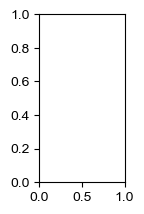

In [43]:
plt.figure()
for i in range(10):
    ax = plt.subplot(2, 5, i + 1)
    image = image_batch[i].numpy().astype("uint8")
    plt.imshow(image)
    plt.title(class_names[label_batch[i]])
    plt.axis("off")
plt.show()

In [46]:
# Define the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

ValueError: One of the dimensions in the output is <= 0 due to downsampling in conv2d_18. Consider increasing the input size. Received input shape [None, 0, 0, 3] which would produce output shape with a zero or negative value in a dimension.

In [54]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [56]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=1
)

675/675 [==============================] - 110s 162ms/step - loss: 1.2169 - accuracy: 0.5531 - val_loss: 1.0438 - val_accuracy: 0.6246


In [57]:
model.save("my_model.h5")

In [58]:
# Load the saved model
loaded_model = keras.models.load_model("my_model.h5")


In [59]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

In [84]:
original_dataset_dir = './KigaliDataset'
train_dataset_dir = './KigaliDataset/train'
valid_dataset_dir = './KigaliDataset/validation'

In [85]:
# Create the destination directories for training and validation datasets
os.makedirs(train_dataset_dir, exist_ok=True)
os.makedirs(valid_dataset_dir, exist_ok=True)

In [99]:
# rate through the subfolders of the original dataset
for subfolder in os.listdir(original_dataset_dir):
    subfolder_path = os.path.join(original_dataset_dir, subfolder)
    if os.path.isdir(subfolder_path):
        # Get the list of TIFF files in the current subfolder
        file_list = [filename for filename in os.listdir(subfolder_path) if filename.endswith('.tif')]
        # Split the file list into training and validation datasets
        train_files, valid_files = train_test_split(file_list, test_size=0.2, random_state=123)
        # Move the files to the corresponding destination folders
        for filename in train_files:
            src_path = os.path.join(subfolder_path, filename)
            dst_path = os.path.join(train_dataset_dir, subfolder, filename)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)
        for filename in valid_files:
            src_path = os.path.join(subfolder_path, filename)
            dst_path = os.path.join(valid_dataset_dir, subfolder, filename)
            os.makedirs(os.path.dirname(dst_path), exist_ok=True)
            shutil.copy(src_path, dst_path)

ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

In [92]:
train_data_dir = './KigaliDataset'

In [93]:
# Define the image size and batch size
img_height, img_width = 256, 256
batch_size = 32

In [94]:
# Split the dataset into training and validation datasets
train_dataset = image_dataset_from_directory(
    train_data_dir,
    validation_split=0.2,  # 80-20 split
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 0 files belonging to 7 classes.
Using 0 files for training.


ValueError: No images found in directory ./KigaliDataset. Allowed formats: ('.bmp', '.gif', '.jpeg', '.jpg', '.png')

In [100]:
root_dir = './KigaliDataset'

In [101]:
# Subfolders of dataset 
folders = os.listdir(root_dir)

In [102]:
# Create directories to split data into train and val 
train_dir = os.path.join(root_dir, "train")  
val_dir = os.path.join(root_dir, "val")
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
if not os.path.exists(val_dir):
    os.mkdir(val_dir)

In [103]:
# Split ratio 
split = 0.2  

In [106]:
for folder in folders:
    folder_path = os.path.join(root_dir, folder)
    images = os.listdir(folder_path)  
    
    # Get number of images in current folder 
    num_images = len(images)  
    
    # Calculate number of images to keep in train and val folders
    num_train = int(np.ceil((1 - split) * num_images)) 
    num_val = int(np.floor(split * num_images))  
    
    # Shuffle image names
    random.shuffle(images)
    
    # Move images to train and val folders 
    for i in range(num_train):  
        shutil.move(os.path.join(folder_path, images[i]), os.path.join(train_dir, folder))
        
    for i in range(num_val): 
        shutil.move(os.path.join(folder_path, images[num_train + i]), os.path.join(val_dir, folder)) 

In [107]:
# Set the path to your dataset directory
data_dir = './KigaliDataset'

In [108]:
# Set the percentage of images to use for validation
val_percent = 20

In [114]:
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [117]:
# Create the directories for training and validation
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

# Loop through each subfolder in the dataset
for folder in os.listdir(data_dir):
    if not os.path.isdir(os.path.join(data_dir, folder)):
        continue
    # Create the corresponding subfolders in the train and val directories
    os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(val_dir, folder), exist_ok=True)
    
    # Get a list of all the files in the subfolder
    files = os.listdir(os.path.join(data_dir, folder))
    
    # Shuffle the files
    random.shuffle(files)
    
    # Calculate the number of files to use for validation
    num_val = int(len(files) * val_percent / 100.0)
    
    # Move the first num_val files to the validation directory
    for f in files[:num_val]:
        src_path = os.path.join(data_dir, folder, f)
        dst_path = os.path.join(val_dir, folder, f)
        if os.path.isfile(src_path):
            shutil.move(src_path, dst_path)
    
    # Move the remaining files to the training directory
    for f in files[num_val:]:
        src_path = os.path.join(data_dir, folder, f)
        dst_path = os.path.join(train_dir, folder, f)
        if os.path.isfile(src_path):
            shutil.move(src_path, dst_path)

In [118]:
# Loop through each subfolder in the dataset
for folder in os.listdir(data_dir):
    if not os.path.isdir(os.path.join(data_dir, folder)):
        continue
    # Create the corresponding subfolders in the train and val directories
    os.makedirs(os.path.join(train_dir, folder), exist_ok=True)
    os.makedirs(os.path.join(val_dir, folder), exist_ok=True)
    
    # Get a list of all the files in the subfolder
    files = os.listdir(os.path.join(data_dir, folder))
    
    # Shuffle the files
    random.shuffle(files)
    
    # Calculate the number of files to use for validation
    num_val = int(len(files) * val_percent / 100.0)
    
    # Move the first num_val files to the validation directory
    for f in files[:num_val]:
        src_path = os.path.join(data_dir, folder, f)
        dst_path = os.path.join(val_dir, folder, f)
        if os.path.isfile(src_path):
            shutil.move(src_path, dst_path)
    
    # Move the remaining files to the training directory
    for f in files[num_val:]:
        src_path = os.path.join(data_dir, folder, f)
        dst_path = os.path.join(train_dir, folder, f)
        if os.path.isfile(src_path):
            shutil.move(src_path, dst_path)

In [120]:
dataset_path = './KigaliDataset'

In [121]:
# Set the percentage of images to use for validation
validation_percent = 20

In [122]:
# Create the training and validation folders
train_path = os.path.join(dataset_path, "train")
val_path = os.path.join(dataset_path, "val")
os.makedirs(train_path, exist_ok=True)
os.makedirs(val_path, exist_ok=True)

In [125]:
# Loop over each subfolder in the dataset folder
for subfolder in os.listdir(dataset_path):
    subfolder_path = os.path.join(dataset_path, subfolder)
    if os.path.isdir(subfolder_path):
        # Create subfolders in the training and validation folders
        subfolder_train_path = os.path.join(train_path, subfolder)
        subfolder_val_path = os.path.join(val_path, subfolder)
        os.makedirs(subfolder_train_path, exist_ok=True)
        os.makedirs(subfolder_val_path, exist_ok=True)

        # Get a list of all the images in the subfolder
        images = os.listdir(subfolder_path)
        num_images = len(images)

        # Shuffle the images
        random.shuffle(images)

        # Calculate the number of images for the validation set
        num_val_images = int(num_images * validation_percent / 100)

        # Move the images to the training and validation folders
        for i, image in enumerate(images):
            if i < num_val_images:
                shutil.copy(os.path.join(subfolder_path, image), subfolder_val_path)
            else:
                shutil.copy(os.path.join(subfolder_path, image), subfolder_train_path)

PermissionError: [Errno 13] Permission denied: './KigaliDataset\\train\\Agriculture'

In [126]:
dataset_dir = './KigaliDataset'
train_dir = './KigaliDataset/training'
valid_dir = './KigaliDataset/validation'

In [127]:
# Create directories for the training and validation datasets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

In [128]:
# Set the percentage split
split_percentage = 0.2

In [131]:
# Loop through the subfolders in the dataset directory
for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    if os.path.isdir(subfolder_path):
        train_subfolder_path = os.path.join(train_dir, subfolder)
        valid_subfolder_path = os.path.join(valid_dir, subfolder)
        os.makedirs(train_subfolder_path, exist_ok=True)
        os.makedirs(valid_subfolder_path, exist_ok=True)

        # Get the list of image files in the subfolder
        image_files = [file for file in os.listdir(subfolder_path) if file.endswith(".tif")]

        # Shuffle the image files
        random.shuffle(image_files)

        # Split the files based on the split_percentage
        split_index = int(len(image_files) * split_percentage)
        train_files = image_files[:split_index]
        valid_files = image_files[split_index:]

        # Move the training files to the corresponding subfolder in the training dataset
        for file in train_files:
            src_path = os.path.join(subfolder_path, file)
            dst_path = os.path.join(train_subfolder_path, file)
            shutil.copy(src_path, dst_path)

        # Move the validation files to the corresponding subfolder in the validation dataset
        for file in valid_files:
            src_path = os.path.join(subfolder_path, file)
            dst_path = os.path.join(valid_subfolder_path, file)
            shutil.copy(src_path, dst_path)

In [135]:
dataset_folder = './KigaliDataset'

In [136]:
train_folder = './KigaliDataset/training'
val_folder = './KigaliDataset/validation'

In [137]:
# Create the training and validation folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

In [138]:
# Define the percentage split between training and validation sets
train_percentage = 0.8
val_percentage = 0.2

In [139]:
for class_folder in os.listdir(dataset_folder):
    class_path = os.path.join(dataset_folder, class_folder)
    
    # Create the corresponding class folders in the training and validation sets
    train_class_path = os.path.join(train_folder, class_folder)
    os.makedirs(train_class_path, exist_ok=True)
    
    val_class_path = os.path.join(val_folder, class_folder)
    os.makedirs(val_class_path, exist_ok=True)
    
    # Get a list of all TIFF images in the class folder
    tiff_files = [file for file in os.listdir(class_path) if file.endswith(".tif")]
    
    # Shuffle the list of TIFF images
    random.shuffle(tiff_files)
    
    # Calculate the number of images for the training and validation sets
    num_train = int(len(tiff_files) * train_percentage)
    num_val = len(tiff_files) - num_train
    
    # Split the TIFF images into training and validation sets
    train_files = tiff_files[:num_train]
    val_files = tiff_files[num_train:]
    
    # Move the training images to the corresponding class folder in the training set
    for file in train_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(train_class_path, file)
        shutil.copy(src, dst)
    
    # Move the validation images to the corresponding class folder in the validation set
    for file in val_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(val_class_path, file)
        shutil.copy(src, dst)

In [151]:
dataset_folder = './KigaliDataset'

In [152]:
train_folder  = './data/training'
test_folder = './data/validation'
val_folder = './data/test'

In [142]:
# Create the train, test, and validation folders if they don't exist
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)
os.makedirs(val_folder, exist_ok=True)

In [143]:
# Define the percentage split between train, test, and validation sets
train_percentage = 0.7
test_percentage = 0.2
val_percentage = 0.1

In [144]:
# Get the list of class folders in the dataset folder
class_folders = os.listdir(dataset_folder)

In [153]:
print(class_folders)

['Agriculture', 'Dense_Forest', 'Forest', 'Settlement', 'Water body']


In [154]:
# Loop through each class folder
for class_folder in class_folders:
    # Create the corresponding class folders in the train, test, and validation sets
    train_class_folder = os.path.join(train_folder, class_folder)
    os.makedirs(train_class_folder, exist_ok=True)
    
    test_class_folder = os.path.join(test_folder, class_folder)
    os.makedirs(test_class_folder, exist_ok=True)
    
    val_class_folder = os.path.join(val_folder, class_folder)
    os.makedirs(val_class_folder, exist_ok=True)
    
    # Get the list of image files in the class folder
    class_path = os.path.join(dataset_folder, class_folder)
    image_files = [file for file in os.listdir(class_path) if file.endswith(".jpg")]
    
    # Shuffle the image files
    random.shuffle(image_files)
    
    # Calculate the number of images for train, test, and validation sets
    num_images = len(image_files)
    num_train = int(num_images * train_percentage)
    num_test = int(num_images * test_percentage)
    num_val = num_images - num_train - num_test
    
    # Split the image files into train, test, and validation sets
    train_files = image_files[:num_train]
    test_files = image_files[num_train:num_train+num_test]
    val_files = image_files[num_train+num_test:]
    
    # Move the train images to the corresponding class folder in the train set
    for file in train_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(train_class_folder, file)
        shutil.copy(src, dst)
    
    # Move the test images to the corresponding class folder in the test set
    for file in test_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(test_class_folder, file)
        shutil.copy(src, dst)
    
    # Move the validation images to the corresponding class folder in the validation set
    for file in val_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(val_class_folder, file)
        shutil.copy(src, dst)

In [155]:
# Loop through each class folder
for class_folder in class_folders:
    # Create the corresponding class folders in the train, test, and validation sets
    train_class_folder = os.path.join(train_folder, class_folder)
    os.makedirs(train_class_folder, exist_ok=True)

    test_class_folder = os.path.join(test_folder, class_folder)
    os.makedirs(test_class_folder, exist_ok=True)

    val_class_folder = os.path.join(val_folder, class_folder)
    os.makedirs(val_class_folder, exist_ok=True)

    # Get the list of image files in the class folder
    class_path = os.path.join(dataset_folder, class_folder)
    image_files = [file for file in os.listdir(class_path) if file.endswith(".jpg")]

    # Shuffle the image files
    random.shuffle(image_files)

    # Calculate the number of images for train, test, and validation sets
    num_images = len(image_files)
    num_train = int(num_images * train_percentage)
    num_test = int(num_images * test_percentage)
    num_val = num_images - num_train - num_test

    # Split the image files into train, test, and validation sets
    train_files = image_files[:num_train]
    test_files = image_files[num_train:num_train+num_test]
    val_files = image_files[num_train+num_test:]

    # Move the train images to the corresponding class folder in the train set
    for file in train_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(train_class_folder, file)
        shutil.copy(src, dst)

    # Move the test images to the corresponding class folder in the test set
    for file in test_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(test_class_folder, file)
        shutil.copy(src, dst)

    # Move the validation images to the corresponding class folder in the validation set
    for file in val_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(val_class_folder, file)
        shutil.copy(src, dst)

In [156]:
# Loop through each class folder
for class_folder in class_folders:
    # Create the corresponding class folders in the train, test, and validation sets
    train_class_folder = os.path.join(train_folder, class_folder)
    os.makedirs(train_class_folder, exist_ok=True)

    test_class_folder = os.path.join(test_folder, class_folder)
    os.makedirs(test_class_folder, exist_ok=True)

    val_class_folder = os.path.join(val_folder, class_folder)
    os.makedirs(val_class_folder, exist_ok=True)

    # Get the list of image files in the class folder
    class_path = os.path.join(dataset_folder, class_folder)
    image_files = [file for file in os.listdir(class_path) if file.endswith(".jpg")]

    # Shuffle the image files
    random.shuffle(image_files)

    # Calculate the number of images for train, test, and validation sets
    num_images = len(image_files)
    num_train = int(num_images * train_percentage)
    num_test = int(num_images * test_percentage)
    num_val = num_images - num_train - num_test

    # Split the image files into train, test, and validation sets
    train_files = image_files[:num_train]
    test_files = image_files[num_train:num_train + num_test]
    val_files = image_files[num_train + num_test:]

    # Move the train images to the corresponding class folder in the train set
    for file in train_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(train_class_folder, file)
        shutil.copy(os.path.join(class_path, file), dst)

    # Move the test images to the corresponding class folder in the test set
    for file in test_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(test_class_folder, file)
        shutil.copy(os.path.join(class_path, file), dst)

    # Move the validation images to the corresponding class folder in the validation set
    for file in val_files:
        src = os.path.join(class_path, file)
        dst = os.path.join(val_class_folder, file)
        shutil.copy(os.path.join(class_path, file), dst)

In [6]:
# Set the path to your dataset folder
dataset_dir = './KigaliDataset'

# Set the paths for training and validation datasets
train_dir = './training'
valid_dir = './validation'

In [7]:
# Set the train-validation split ratio
split_ratio = 0.8

# Create the directories for training and validation datasets
os.makedirs(train_dir, exist_ok=True)
os.makedirs(valid_dir, exist_ok=True)

In [8]:
# Loop through each subfolder in the dataset
for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    
    # Check if the item is a directory
    if os.path.isdir(subfolder_path):
        # Get the list of image files in the subfolder
        images = os.listdir(subfolder_path)
        num_images = len(images)
        
        # Calculate the number of images for training and validation
        num_train = int(num_images * split_ratio)
        num_valid = num_images - num_train
        
        # Shuffle the images randomly
        random.shuffle(images)
        
        # Split the images into training and validation sets
        train_images = images[:num_train]
        valid_images = images[num_train:]
        
        # Move the training images to the training directory
        for train_image in train_images:
            src_path = os.path.join(subfolder_path, train_image)
            dest_path = os.path.join(train_dir, subfolder, train_image)
            shutil.copy(src_path, dest_path)
        
        # Move the validation images to the validation directory
        for valid_image in valid_images:
            src_path = os.path.join(subfolder_path, valid_image)
            dest_path = os.path.join(valid_dir, subfolder, valid_image)
            shutil.copy(src_path, dest_path)

In [9]:
# Loop through each subfolder in the dataset
for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    
    # Check if the item is a directory
    if os.path.isdir(subfolder_path):
        # Get the list of image files in the subfolder
        images = os.listdir(subfolder_path)
        num_images = len(images)
        
        # Calculate the number of images for training and validation
        num_train = int(num_images * split_ratio)
        num_valid = num_images - num_train
        
        # Shuffle the images randomly
        random.shuffle(images)
        
        # Split the images into training and validation sets
        train_images = images[:num_train]
        valid_images = images[num_train:]
        
        # Create the subfolders inside train_dir and valid_dir
        train_subfolder_path = os.path.join(train_dir, subfolder)
        valid_subfolder_path = os.path.join(valid_dir, subfolder)
        os.makedirs(train_subfolder_path, exist_ok=True)
        os.makedirs(valid_subfolder_path, exist_ok=True)
        
        # Move the training images to the training directory
        for train_image in train_images:
            src_path = os.path.join(subfolder_path, train_image)
            dest_path = os.path.join(train_subfolder_path, train_image)
            shutil.copy(src_path, dest_path)
        
        # Move the validation images to the validation directory
        for valid_image in valid_images:
            src_path = os.path.join(subfolder_path, valid_image)
            dest_path = os.path.join(valid_subfolder_path, valid_image)
            shutil.copy(src_path, dest_path)

In [10]:
# Loop through each subfolder in the dataset
for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    
    # Check if the item is a directory
    if os.path.isdir(subfolder_path):
        # Get the list of image files in the subfolder
        images = os.listdir(subfolder_path)
        num_images = len(images)
        
        # Calculate the number of images for training and validation
        num_train = int(num_images * split_ratio)
        num_valid = num_images - num_train
        
        # Shuffle the images randomly
        random.shuffle(images)
        
        # Create the subfolders inside train_dir and valid_dir
        train_subfolder_path = os.path.join(train_dir, subfolder)
        valid_subfolder_path = os.path.join(valid_dir, subfolder)
        os.makedirs(train_subfolder_path, exist_ok=True)
        os.makedirs(valid_subfolder_path, exist_ok=True)
        
        # Move the training images to the training directory
        for train_image in images[:num_train]:
            src_path = os.path.join(subfolder_path, train_image)
            dest_path = os.path.join(train_subfolder_path, train_image)
            shutil.move(src_path, dest_path)
        
        # Move the validation images to the validation directory
        for valid_image in images[num_train:]:
            src_path = os.path.join(subfolder_path, valid_image)
            dest_path = os.path.join(valid_subfolder_path, valid_image)
            shutil.move(src_path, dest_path)

In [11]:
# Loop through each subfolder in the dataset
for subfolder in os.listdir(dataset_dir):
    subfolder_path = os.path.join(dataset_dir, subfolder)
    
    # Check if the item is a directory
    if os.path.isdir(subfolder_path):
        # Get the list of image files in the subfolder
        images = os.listdir(subfolder_path)
        num_images = len(images)
        
        # Calculate the number of images for training and validation
        num_train = int(num_images * split_ratio)
        num_valid = num_images - num_train
        
        # Shuffle the images randomly
        random.shuffle(images)
        
        # Create the subfolders inside train_dir and valid_dir
        train_subfolder_path = os.path.join(train_dir, subfolder)
        valid_subfolder_path = os.path.join(valid_dir, subfolder)
        os.makedirs(train_subfolder_path, exist_ok=True)
        os.makedirs(valid_subfolder_path, exist_ok=True)
        
        # Move the training images to the training directory
        for train_image in images[:num_train]:
            src_path = os.path.join(subfolder_path, train_image)
            dest_path = os.path.join(train_subfolder_path, train_image)
            shutil.copy(src_path, dest_path)
        
        # Move the validation images to the validation directory
        for valid_image in images[num_train:]:
            src_path = os.path.join(subfolder_path, valid_image)
            dest_path = os.path.join(valid_subfolder_path, valid_image)
            shutil.copy(src_path, dest_path)

## Start 

In [3]:
# Set the path to the dataset directory
dataset_dir = './KigaliDataset'

# Set the paths to the training and validation directories
train_dir = './train'
val_dir = './val'

In [10]:
# Create the training and validation directories if they don't exist
if not os.path.exists(train_dir):
    os.makedirs(train_dir)
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

In [11]:
# Set the percentage of images to use for validation
val_pct = 0.2

In [12]:
# Iterate through each subfolder in the dataset folder
for class_dir in os.listdir(dataset_dir):
    if os.path.isdir(os.path.join(dataset_dir, class_dir)):
        print(f"Processing images in {class_dir} folder...")
        
        # Create the corresponding subfolders in the training and validation directories
        train_class_dir = os.path.join(train_dir, class_dir)
        val_class_dir = os.path.join(val_dir, class_dir)
        if not os.path.exists(train_class_dir):
            os.makedirs(train_class_dir)
        if not os.path.exists(val_class_dir):
            os.makedirs(val_class_dir)
        
        # Get the list of images in the current subfolder
        img_list = os.listdir(os.path.join(dataset_dir, class_dir))
        
        # Shuffle the image list
        random.shuffle(img_list)
        
        # Split the image list into training and validation sets
        val_size = int(len(img_list) * val_pct)
        val_list = img_list[:val_size]
        train_list = img_list[val_size:]
        
        # Move the training images to the corresponding subfolder in the training directory
        for img_name in train_list:
            src_path = os.path.join(dataset_dir, class_dir, img_name)
            dst_path = os.path.join(train_class_dir, img_name)
            shutil.copy2(src_path, dst_path)
        
        # Move the validation images to the corresponding subfolder in the validation directory
        for img_name in val_list:
            src_path = os.path.join(dataset_dir, class_dir, img_name)
            dst_path = os.path.join(val_class_dir, img_name)
            shutil.copy2(src_path, dst_path)
        
        print(f"  {len(train_list)} images moved to {train_class_dir}")
        print(f"  {len(val_list)} images moved to {val_class_dir}")

Processing images in Agriculture folder...
  4440 images moved to ./train\Agriculture
  1110 images moved to ./val\Agriculture
Processing images in Dense_Forest folder...
  4506 images moved to ./train\Dense_Forest
  1126 images moved to ./val\Dense_Forest
Processing images in Forest folder...
  1374 images moved to ./train\Forest
  343 images moved to ./val\Forest
Processing images in Settlement folder...
  4448 images moved to ./train\Settlement
  1112 images moved to ./val\Settlement
Processing images in Water body folder...
  4869 images moved to ./train\Water body
  1217 images moved to ./val\Water body


In [4]:
class_list = os.listdir(dataset_dir)

# Print the number of classes in the dataset directory
print(f"Number of classes: {len(class_list)}")


Number of classes: 5


In [5]:
print(class_list)

['Agriculture', 'Dense_Forest', 'Forest', 'Settlement', 'Water body']


In [6]:
# Print the names of the classes in the dataset directory
print("Class names:")
for class_dir in class_list:
    if os.path.isdir(os.path.join(dataset_dir, class_dir)):
        print(class_dir)

Class names:
Agriculture
Dense_Forest
Forest
Settlement
Water body


In [7]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [43]:
# Set the number of classes and the input shape for the model
num_classes = len(os.listdir(train_dir))
input_shape = (256, 256, 3)

# Set up the data generator for the training and validation sets
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical')

Found 19637 images belonging to 5 classes.
Found 4908 images belonging to 5 classes.


In [44]:
class_names = train_generator.class_names

AttributeError: 'DirectoryIterator' object has no attribute 'class_names'

In [24]:
# Define the model architecture
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [25]:
print(num_classes)

5


In [26]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [27]:
# Train the model
history = model.fit(train_generator,
                    epochs=30,
                    validation_data=val_generator)

Epoch 1/30
614/614 [==============================] - 4027s 7s/step - loss: 0.3191 - accuracy: 0.8945 - val_loss: 0.2085 - val_accuracy: 0.9356
Epoch 2/30
614/614 [==============================] - 1987s 3s/step - loss: 0.2246 - accuracy: 0.9262 - val_loss: 0.1998 - val_accuracy: 0.9374
Epoch 3/30
614/614 [==============================] - 1978s 3s/step - loss: 0.1878 - accuracy: 0.9387 - val_loss: 0.1975 - val_accuracy: 0.9407
Epoch 4/30
614/614 [==============================] - 1492s 2s/step - loss: 0.1600 - accuracy: 0.9451 - val_loss: 0.2727 - val_accuracy: 0.9232
Epoch 5/30
614/614 [==============================] - 1506s 2s/step - loss: 0.1317 - accuracy: 0.9562 - val_loss: 0.2442 - val_accuracy: 0.9287
Epoch 6/30
614/614 [==============================] - 3069s 5s/step - loss: 0.1109 - accuracy: 0.9634 - val_loss: 0.2630 - val_accuracy: 0.9322
Epoch 7/30
614/614 [==============================] - 2578s 4s/step - loss: 0.0930 - accuracy: 0.9690 - val_loss: 0.3304 - val_accuracy:

In [2]:
model.save("my_model.h5")


NameError: name 'model' is not defined

In [7]:
# Load the saved model
loaded_model = keras.models.load_model("my_model.h5")

In [8]:
loaded_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 128)     

In [10]:
epochs = 30

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']


NameError: name 'history' is not defined

In [16]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

## Tesing phase

In [12]:
# Set the paths to the testing dataset
image_folder = './mydata/imagess'

In [13]:
image_files = os.listdir(image_folder)

In [14]:
num_tiles = len(image_files)

In [15]:
print(num_tiles)

12100


In [47]:
for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
#     image = cv2.resize(image, (64, 64))
    # Preprocess the image (if needed)
    # Perform any necessary preprocessing steps such as resizing, normalization, etc.

    # Make prediction
    prediction = loaded_model.predict(np.expand_dims(image, axis=0))

    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)

    # Get the predicted class label
#     predicted_class_label = class_names[predicted_class_index]

    # Print the prediction result
    #print(f"Image: {image_file}, Predicted class: {predicted_class_label}")
    print(f"Image: {image_file}, Predicted class: {predicted_class_index}")

1/1 [==============================] - 0s 63ms/step
Image: ._data_00001.tif, Predicted class: 3
1/1 [==============================] - 0s 62ms/step
Image: ._data_00002.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_00003.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_00004.tif, Predicted class: 3
1/1 [==============================] - 0s 66ms/step
Image: ._data_00005.tif, Predicted class: 3
1/1 [==============================] - 0s 65ms/step
Image: ._data_00006.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_00007.tif, Predicted class: 3
1/1 [==============================] - 0s 63ms/step
Image: ._data_00008.tif, Predicted class: 3
1/1 [==============================] - 0s 59ms/step
Image: ._data_00009.tif, Predicted class: 3
1/1 [==============================] - 0s 65ms/step
Image: ._data_00010.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 66ms/step
Image: ._data_00171.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_00172.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_00173.tif, Predicted class: 4
1/1 [==============================] - 0s 69ms/step
Image: ._data_00174.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_00175.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_00176.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_00177.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_00178.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_00179.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_00180.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 74ms/step
Image: ._data_00341.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_00342.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_00343.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_00344.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_00345.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_00346.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_00347.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_00348.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_00349.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_00350.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 63ms/step
Image: ._data_00511.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00512.tif, Predicted class: 4
1/1 [==============================] - 0s 57ms/step
Image: ._data_00513.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_00514.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_00515.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_00516.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_00517.tif, Predicted class: 3
1/1 [==============================] - 0s 62ms/step
Image: ._data_00518.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_00519.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_00520.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 71ms/step
Image: ._data_00681.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_00682.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_00683.tif, Predicted class: 4
1/1 [==============================] - 0s 72ms/step
Image: ._data_00684.tif, Predicted class: 4
1/1 [==============================] - 0s 68ms/step
Image: ._data_00685.tif, Predicted class: 4
1/1 [==============================] - 0s 68ms/step
Image: ._data_00686.tif, Predicted class: 3
1/1 [==============================] - 0s 69ms/step
Image: ._data_00687.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_00688.tif, Predicted class: 4
1/1 [==============================] - 0s 71ms/step
Image: ._data_00689.tif, Predicted class: 4
1/1 [==============================] - 0s 71ms/step
Image: ._data_00690.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 63ms/step
Image: ._data_00851.tif, Predicted class: 3
1/1 [==============================] - 0s 65ms/step
Image: ._data_00852.tif, Predicted class: 4
1/1 [==============================] - 0s 68ms/step
Image: ._data_00853.tif, Predicted class: 4
1/1 [==============================] - 0s 70ms/step
Image: ._data_00854.tif, Predicted class: 3
1/1 [==============================] - 0s 68ms/step
Image: ._data_00855.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_00856.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_00857.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_00858.tif, Predicted class: 3
1/1 [==============================] - 0s 65ms/step
Image: ._data_00859.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_00860.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 69ms/step
Image: ._data_01021.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_01022.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_01023.tif, Predicted class: 4
1/1 [==============================] - 0s 69ms/step
Image: ._data_01024.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_01025.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_01026.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_01027.tif, Predicted class: 4
1/1 [==============================] - 0s 70ms/step
Image: ._data_01028.tif, Predicted class: 4
1/1 [==============================] - 0s 66ms/step
Image: ._data_01029.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_01030.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 69ms/step
Image: ._data_01191.tif, Predicted class: 3
1/1 [==============================] - 0s 69ms/step
Image: ._data_01192.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_01193.tif, Predicted class: 4
1/1 [==============================] - 0s 69ms/step
Image: ._data_01194.tif, Predicted class: 3
1/1 [==============================] - 0s 65ms/step
Image: ._data_01195.tif, Predicted class: 4
1/1 [==============================] - 0s 68ms/step
Image: ._data_01196.tif, Predicted class: 4
1/1 [==============================] - 0s 69ms/step
Image: ._data_01197.tif, Predicted class: 3
1/1 [==============================] - 0s 66ms/step
Image: ._data_01198.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_01199.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_01200.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 69ms/step
Image: ._data_01361.tif, Predicted class: 4
1/1 [==============================] - 0s 66ms/step
Image: ._data_01362.tif, Predicted class: 4
1/1 [==============================] - 0s 68ms/step
Image: ._data_01363.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_01364.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_01365.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_01366.tif, Predicted class: 4
1/1 [==============================] - 0s 70ms/step
Image: ._data_01367.tif, Predicted class: 3
1/1 [==============================] - 0s 68ms/step
Image: ._data_01368.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01369.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_01370.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 70ms/step
Image: ._data_01531.tif, Predicted class: 4
1/1 [==============================] - 0s 71ms/step
Image: ._data_01532.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_01533.tif, Predicted class: 4
1/1 [==============================] - 0s 85ms/step
Image: ._data_01534.tif, Predicted class: 4
1/1 [==============================] - 0s 74ms/step
Image: ._data_01535.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_01536.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_01537.tif, Predicted class: 3
1/1 [==============================] - 0s 62ms/step
Image: ._data_01538.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_01539.tif, Predicted class: 4
1/1 [==============================] - 0s 82ms/step
Image: ._data_01540.tif, Predicted class: 2
1/1 [==============================] - 0

1/1 [==============================] - 0s 70ms/step
Image: ._data_01701.tif, Predicted class: 4
1/1 [==============================] - 0s 71ms/step
Image: ._data_01702.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_01703.tif, Predicted class: 4
1/1 [==============================] - 0s 71ms/step
Image: ._data_01704.tif, Predicted class: 4
1/1 [==============================] - 0s 70ms/step
Image: ._data_01705.tif, Predicted class: 4
1/1 [==============================] - 0s 69ms/step
Image: ._data_01706.tif, Predicted class: 4
1/1 [==============================] - 0s 56ms/step
Image: ._data_01707.tif, Predicted class: 4
1/1 [==============================] - 0s 61ms/step
Image: ._data_01708.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_01709.tif, Predicted class: 4
1/1 [==============================] - 0s 70ms/step
Image: ._data_01710.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 72ms/step
Image: ._data_01871.tif, Predicted class: 3
1/1 [==============================] - 0s 69ms/step
Image: ._data_01872.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_01873.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_01874.tif, Predicted class: 3
1/1 [==============================] - 0s 65ms/step
Image: ._data_01875.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_01876.tif, Predicted class: 4
1/1 [==============================] - 0s 71ms/step
Image: ._data_01877.tif, Predicted class: 4
1/1 [==============================] - 0s 69ms/step
Image: ._data_01878.tif, Predicted class: 4
1/1 [==============================] - 0s 71ms/step
Image: ._data_01879.tif, Predicted class: 4
1/1 [==============================] - 0s 70ms/step
Image: ._data_01880.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 78ms/step
Image: ._data_02041.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02042.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_02043.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_02044.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_02045.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_02046.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_02047.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_02048.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_02049.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02050.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 83ms/step
Image: ._data_02211.tif, Predicted class: 3
1/1 [==============================] - 0s 69ms/step
Image: ._data_02212.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_02213.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_02214.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02215.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02216.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_02217.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_02218.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_02219.tif, Predicted class: 3
1/1 [==============================] - 0s 59ms/step
Image: ._data_02220.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 86ms/step
Image: ._data_02381.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_02382.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_02383.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_02384.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_02385.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02386.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02387.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_02388.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_02389.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_02390.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 74ms/step
Image: ._data_02551.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_02552.tif, Predicted class: 3
1/1 [==============================] - 0s 184ms/step
Image: ._data_02553.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_02554.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02555.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_02556.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02557.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_02558.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02559.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_02560.tif, Predicted class: 4
1/1 [==============================] - 

1/1 [==============================] - 0s 72ms/step
Image: ._data_02721.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_02722.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_02723.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_02724.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_02725.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_02726.tif, Predicted class: 4
1/1 [==============================] - 0s 72ms/step
Image: ._data_02727.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_02728.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02729.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_02730.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 94ms/step
Image: ._data_02891.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_02892.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_02893.tif, Predicted class: 4
1/1 [==============================] - 0s 71ms/step
Image: ._data_02894.tif, Predicted class: 4
1/1 [==============================] - 0s 63ms/step
Image: ._data_02895.tif, Predicted class: 3
1/1 [==============================] - 0s 121ms/step
Image: ._data_02896.tif, Predicted class: 4
1/1 [==============================] - 0s 63ms/step
Image: ._data_02897.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_02898.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_02899.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_02900.tif, Predicted class: 3
1/1 [==============================] - 

1/1 [==============================] - 0s 72ms/step
Image: ._data_03061.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_03062.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_03063.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_03064.tif, Predicted class: 4
1/1 [==============================] - 0s 71ms/step
Image: ._data_03065.tif, Predicted class: 4
1/1 [==============================] - 0s 70ms/step
Image: ._data_03066.tif, Predicted class: 4
1/1 [==============================] - 0s 72ms/step
Image: ._data_03067.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_03068.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_03069.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_03070.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 75ms/step
Image: ._data_03231.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_03232.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_03233.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_03234.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_03235.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_03236.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_03237.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_03238.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_03239.tif, Predicted class: 4
1/1 [==============================] - 0s 71ms/step
Image: ._data_03240.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 72ms/step
Image: ._data_03401.tif, Predicted class: 4
1/1 [==============================] - 0s 69ms/step
Image: ._data_03402.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_03403.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_03404.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_03405.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_03406.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_03407.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_03408.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_03409.tif, Predicted class: 3
1/1 [==============================] - 0s 69ms/step
Image: ._data_03410.tif, Predicted class: 2
1/1 [==============================] - 0

1/1 [==============================] - 0s 64ms/step
Image: ._data_03571.tif, Predicted class: 3
1/1 [==============================] - 0s 69ms/step
Image: ._data_03572.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_03573.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_03574.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_03575.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_03576.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_03577.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_03578.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_03579.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_03580.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 73ms/step
Image: ._data_03741.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_03742.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_03743.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_03744.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_03745.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_03746.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_03747.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_03748.tif, Predicted class: 4
1/1 [==============================] - 0s 74ms/step
Image: ._data_03749.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_03750.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 81ms/step
Image: ._data_03911.tif, Predicted class: 3
1/1 [==============================] - 0s 69ms/step
Image: ._data_03912.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_03913.tif, Predicted class: 3
1/1 [==============================] - 0s 68ms/step
Image: ._data_03914.tif, Predicted class: 3
1/1 [==============================] - 0s 88ms/step
Image: ._data_03915.tif, Predicted class: 4
1/1 [==============================] - 0s 86ms/step
Image: ._data_03916.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_03917.tif, Predicted class: 3
1/1 [==============================] - 0s 62ms/step
Image: ._data_03918.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_03919.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_03920.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 167ms/step
Image: ._data_04081.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_04082.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_04083.tif, Predicted class: 3
1/1 [==============================] - 0s 87ms/step
Image: ._data_04084.tif, Predicted class: 3
1/1 [==============================] - 0s 84ms/step
Image: ._data_04085.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_04086.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_04087.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_04088.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_04089.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_04090.tif, Predicted class: 4
1/1 [==============================] - 

1/1 [==============================] - 0s 78ms/step
Image: ._data_04251.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_04252.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_04253.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_04254.tif, Predicted class: 4
1/1 [==============================] - 0s 79ms/step
Image: ._data_04255.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_04256.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_04257.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_04258.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_04259.tif, Predicted class: 4
1/1 [==============================] - 0s 79ms/step
Image: ._data_04260.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 82ms/step
Image: ._data_04421.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_04422.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_04423.tif, Predicted class: 4
1/1 [==============================] - 0s 198ms/step
Image: ._data_04424.tif, Predicted class: 3
1/1 [==============================] - 0s 159ms/step
Image: ._data_04425.tif, Predicted class: 4
1/1 [==============================] - 0s 169ms/step
Image: ._data_04426.tif, Predicted class: 4
1/1 [==============================] - 0s 164ms/step
Image: ._data_04427.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_04428.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_04429.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_04430.tif, Predicted class: 3
1/1 [==============================

1/1 [==============================] - 0s 92ms/step
Image: ._data_04591.tif, Predicted class: 3
1/1 [==============================] - 0s 84ms/step
Image: ._data_04592.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_04593.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_04594.tif, Predicted class: 4
1/1 [==============================] - 0s 82ms/step
Image: ._data_04595.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_04596.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_04597.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_04598.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_04599.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_04600.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 85ms/step
Image: ._data_04761.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_04762.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_04763.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_04764.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_04765.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_04766.tif, Predicted class: 4
1/1 [==============================] - 0s 86ms/step
Image: ._data_04767.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_04768.tif, Predicted class: 4
1/1 [==============================] - 0s 87ms/step
Image: ._data_04769.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_04770.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 77ms/step
Image: ._data_04931.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_04932.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_04933.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_04934.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_04935.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_04936.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_04937.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_04938.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_04939.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_04940.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 79ms/step
Image: ._data_05101.tif, Predicted class: 3
1/1 [==============================] - 0s 115ms/step
Image: ._data_05102.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_05103.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_05104.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_05105.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_05106.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_05107.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_05108.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_05109.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_05110.tif, Predicted class: 4
1/1 [==============================] - 

1/1 [==============================] - 0s 80ms/step
Image: ._data_05271.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_05272.tif, Predicted class: 4
1/1 [==============================] - 0s 79ms/step
Image: ._data_05273.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_05274.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_05275.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_05276.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_05277.tif, Predicted class: 4
1/1 [==============================] - 0s 68ms/step
Image: ._data_05278.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_05279.tif, Predicted class: 3
1/1 [==============================] - 0s 84ms/step
Image: ._data_05280.tif, Predicted class: 2
1/1 [==============================] - 0

1/1 [==============================] - 0s 73ms/step
Image: ._data_05441.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_05442.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_05443.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_05444.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_05445.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_05446.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_05447.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_05448.tif, Predicted class: 4
1/1 [==============================] - 0s 64ms/step
Image: ._data_05449.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_05450.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 79ms/step
Image: ._data_05611.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_05612.tif, Predicted class: 4
1/1 [==============================] - 0s 70ms/step
Image: ._data_05613.tif, Predicted class: 4
1/1 [==============================] - 0s 62ms/step
Image: ._data_05614.tif, Predicted class: 4
1/1 [==============================] - 0s 83ms/step
Image: ._data_05615.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_05616.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_05617.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_05618.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_05619.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_05620.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 79ms/step
Image: ._data_05781.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_05782.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_05783.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_05784.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_05785.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_05786.tif, Predicted class: 3
1/1 [==============================] - 0s 63ms/step
Image: ._data_05787.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_05788.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_05789.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_05790.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 63ms/step
Image: ._data_05951.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_05952.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_05953.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_05954.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_05955.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_05956.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_05957.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_05958.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_05959.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_05960.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 72ms/step
Image: ._data_06121.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_06122.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_06123.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_06124.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_06125.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_06126.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_06127.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_06128.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_06129.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_06130.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 79ms/step
Image: ._data_06291.tif, Predicted class: 4
1/1 [==============================] - 0s 63ms/step
Image: ._data_06292.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_06293.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_06294.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_06295.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_06296.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_06297.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_06298.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_06299.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_06300.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 77ms/step
Image: ._data_06461.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_06462.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_06463.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_06464.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_06465.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_06466.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_06467.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_06468.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_06469.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_06470.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 80ms/step
Image: ._data_06631.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_06632.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_06633.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_06634.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_06635.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_06636.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_06637.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_06638.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_06639.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_06640.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 78ms/step
Image: ._data_06801.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_06802.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_06803.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_06804.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_06805.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_06806.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_06807.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_06808.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_06809.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_06810.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 84ms/step
Image: ._data_06971.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_06972.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_06973.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_06974.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_06975.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_06976.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_06977.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_06978.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_06979.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_06980.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 75ms/step
Image: ._data_07141.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_07142.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_07143.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_07144.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_07145.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_07146.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_07147.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_07148.tif, Predicted class: 4
1/1 [==============================] - 0s 72ms/step
Image: ._data_07149.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_07150.tif, Predicted class: 2
1/1 [==============================] - 0

1/1 [==============================] - 0s 81ms/step
Image: ._data_07311.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_07312.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_07313.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07314.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_07315.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_07316.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_07317.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_07318.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_07319.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07320.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 83ms/step
Image: ._data_07481.tif, Predicted class: 3
1/1 [==============================] - 0s 91ms/step
Image: ._data_07482.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_07483.tif, Predicted class: 3
1/1 [==============================] - 0s 66ms/step
Image: ._data_07484.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_07485.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_07486.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_07487.tif, Predicted class: 3
1/1 [==============================] - 0s 84ms/step
Image: ._data_07488.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_07489.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_07490.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 63ms/step
Image: ._data_07651.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_07652.tif, Predicted class: 3
1/1 [==============================] - 0s 62ms/step
Image: ._data_07653.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_07654.tif, Predicted class: 3
1/1 [==============================] - 0s 63ms/step
Image: ._data_07655.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_07656.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07657.tif, Predicted class: 3
1/1 [==============================] - 0s 65ms/step
Image: ._data_07658.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_07659.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_07660.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 73ms/step
Image: ._data_07821.tif, Predicted class: 4
1/1 [==============================] - 0s 74ms/step
Image: ._data_07822.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_07823.tif, Predicted class: 4
1/1 [==============================] - 0s 63ms/step
Image: ._data_07824.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_07825.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_07826.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_07827.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_07828.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_07829.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_07830.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 77ms/step
Image: ._data_07991.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_07992.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_07993.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_07994.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_07995.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_07996.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_07997.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_07998.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_07999.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_08000.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 75ms/step
Image: ._data_08161.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_08162.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_08163.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_08164.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_08165.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_08166.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_08167.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_08168.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_08169.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_08170.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 100ms/step
Image: ._data_08331.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_08332.tif, Predicted class: 3
1/1 [==============================] - 0s 68ms/step
Image: ._data_08333.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_08334.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_08335.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_08336.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_08337.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_08338.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_08339.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_08340.tif, Predicted class: 3
1/1 [==============================] - 

1/1 [==============================] - 0s 64ms/step
Image: ._data_08501.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_08502.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_08503.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_08504.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_08505.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_08506.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_08507.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_08508.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_08509.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_08510.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 84ms/step
Image: ._data_08671.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_08672.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_08673.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_08674.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_08675.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_08676.tif, Predicted class: 4
1/1 [==============================] - 0s 90ms/step
Image: ._data_08677.tif, Predicted class: 3
1/1 [==============================] - 0s 65ms/step
Image: ._data_08678.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_08679.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_08680.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 80ms/step
Image: ._data_08841.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_08842.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_08843.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_08844.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_08845.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_08846.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_08847.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_08848.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_08849.tif, Predicted class: 3
1/1 [==============================] - 0s 66ms/step
Image: ._data_08850.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 81ms/step
Image: ._data_09011.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_09012.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_09013.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_09014.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_09015.tif, Predicted class: 4
1/1 [==============================] - 0s 79ms/step
Image: ._data_09016.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_09017.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_09018.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_09019.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_09020.tif, Predicted class: 2
1/1 [==============================] - 0

1/1 [==============================] - 0s 78ms/step
Image: ._data_09181.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_09182.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_09183.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_09184.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_09185.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_09186.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_09187.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_09188.tif, Predicted class: 4
1/1 [==============================] - 0s 83ms/step
Image: ._data_09189.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_09190.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 81ms/step
Image: ._data_09351.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_09352.tif, Predicted class: 4
1/1 [==============================] - 0s 86ms/step
Image: ._data_09353.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_09354.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_09355.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_09356.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_09357.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_09358.tif, Predicted class: 4
1/1 [==============================] - 0s 82ms/step
Image: ._data_09359.tif, Predicted class: 4
1/1 [==============================] - 0s 83ms/step
Image: ._data_09360.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 66ms/step
Image: ._data_09521.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_09522.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_09523.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_09524.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_09525.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_09526.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_09527.tif, Predicted class: 3
1/1 [==============================] - 0s 61ms/step
Image: ._data_09528.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_09529.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_09530.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 74ms/step
Image: ._data_09691.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_09692.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_09693.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_09694.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_09695.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_09696.tif, Predicted class: 4
1/1 [==============================] - 0s 74ms/step
Image: ._data_09697.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_09698.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_09699.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_09700.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 76ms/step
Image: ._data_09861.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_09862.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_09863.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_09864.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_09865.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_09866.tif, Predicted class: 4
1/1 [==============================] - 0s 82ms/step
Image: ._data_09867.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_09868.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_09869.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_09870.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 73ms/step
Image: ._data_10031.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_10032.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_10033.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_10034.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_10035.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_10036.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_10037.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_10038.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_10039.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_10040.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 81ms/step
Image: ._data_10201.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_10202.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_10203.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_10204.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_10205.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_10206.tif, Predicted class: 4
1/1 [==============================] - 0s 82ms/step
Image: ._data_10207.tif, Predicted class: 3
1/1 [==============================] - 0s 61ms/step
Image: ._data_10208.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_10209.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_10210.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 78ms/step
Image: ._data_10371.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_10372.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_10373.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_10374.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_10375.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_10376.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_10377.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_10378.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_10379.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_10380.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 80ms/step
Image: ._data_10541.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_10542.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_10543.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_10544.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_10545.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_10546.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_10547.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_10548.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_10549.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_10550.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 82ms/step
Image: ._data_10711.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_10712.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_10713.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_10714.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_10715.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_10716.tif, Predicted class: 4
1/1 [==============================] - 0s 85ms/step
Image: ._data_10717.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_10718.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_10719.tif, Predicted class: 3
1/1 [==============================] - 0s 84ms/step
Image: ._data_10720.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 83ms/step
Image: ._data_10881.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_10882.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_10883.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_10884.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_10885.tif, Predicted class: 4
1/1 [==============================] - 0s 82ms/step
Image: ._data_10886.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_10887.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_10888.tif, Predicted class: 3
1/1 [==============================] - 0s 84ms/step
Image: ._data_10889.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_10890.tif, Predicted class: 2
1/1 [==============================] - 0

1/1 [==============================] - 0s 86ms/step
Image: ._data_11051.tif, Predicted class: 4
1/1 [==============================] - 0s 87ms/step
Image: ._data_11052.tif, Predicted class: 4
1/1 [==============================] - 0s 83ms/step
Image: ._data_11053.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_11054.tif, Predicted class: 3
1/1 [==============================] - 0s 88ms/step
Image: ._data_11055.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_11056.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_11057.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_11058.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_11059.tif, Predicted class: 3
1/1 [==============================] - 0s 68ms/step
Image: ._data_11060.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 90ms/step
Image: ._data_11221.tif, Predicted class: 4
1/1 [==============================] - 0s 69ms/step
Image: ._data_11222.tif, Predicted class: 4
1/1 [==============================] - 0s 86ms/step
Image: ._data_11223.tif, Predicted class: 4
1/1 [==============================] - 0s 84ms/step
Image: ._data_11224.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_11225.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_11226.tif, Predicted class: 4
1/1 [==============================] - 0s 63ms/step
Image: ._data_11227.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_11228.tif, Predicted class: 3
1/1 [==============================] - 0s 92ms/step
Image: ._data_11229.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_11230.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 68ms/step
Image: ._data_11391.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_11392.tif, Predicted class: 4
1/1 [==============================] - 0s 80ms/step
Image: ._data_11393.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_11394.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_11395.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_11396.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_11397.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_11398.tif, Predicted class: 4
1/1 [==============================] - 0s 79ms/step
Image: ._data_11399.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_11400.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 76ms/step
Image: ._data_11561.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_11562.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_11563.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_11564.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_11565.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_11566.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_11567.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_11568.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_11569.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_11570.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 64ms/step
Image: ._data_11731.tif, Predicted class: 3
1/1 [==============================] - 0s 69ms/step
Image: ._data_11732.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_11733.tif, Predicted class: 3
1/1 [==============================] - 0s 65ms/step
Image: ._data_11734.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_11735.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_11736.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_11737.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_11738.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_11739.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_11740.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 79ms/step
Image: ._data_11901.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_11902.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_11903.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_11904.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_11905.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_11906.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_11907.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_11908.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_11909.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_11910.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 82ms/step
Image: ._data_12071.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_12072.tif, Predicted class: 3
1/1 [==============================] - 0s 68ms/step
Image: ._data_12073.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_12074.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_12075.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_12076.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_12077.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_12078.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_12079.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_12080.tif, Predicted class: 3
1/1 [==============================] - 0

In [16]:
image_files = os.listdir(image_folder)

In [84]:
class_to_pixel = {}
for i in range(len(image_files)):
    image_file = image_files[i]
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
#     image = cv2.resize(image, (64, 64))
    # Preprocess the image (if needed)
    # Perform any necessary preprocessing steps such as resizing, normalization, etc.

    # Make prediction
    prediction = model.predict(np.expand_dims(image, axis=0))

    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)

    # Map predicted class index to pixel value
    if predicted_class_index not in class_to_pixel:
        class_to_pixel[predicted_class_index] = i+1

1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 155ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 179ms/step


1/1 [==============================] - 0s 160ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 195ms/step


1/1 [==============================] - 0s 155ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 0s 155ms/step


1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 169ms/step


1/1 [==============================] - 0s 134ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 104ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 134ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 103ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 92ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 87ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 100ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 99ms/step


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 114ms/step


1/1 [==============================] - 0s 94ms/step


In [87]:
# Step 2: Open output file for writing
output_file = './dataset/output3.tif'
total_tiles = len(image_files)
cols = int(total_tiles ** 0.5)
rows = (total_tiles + cols - 1) // cols


In [89]:
profile.update(driver='GTiff',
               height=rows * height,
               width=cols * width,
               transform=transform,
               crs=crs,
               count=3)  # Assuming 3 channels for RGB

In [46]:
for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (256, 256))

    # Preprocess the image (if needed)
    # Perform any necessary preprocessing steps such as resizing, normalization, etc.

    # Make prediction
    prediction = loaded_model.predict(np.expand_dims(image, axis=0))

    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)

    # Print the prediction result
    print(f"Image: {image_file}, Predicted class: {predicted_class_index}")

1/1 [==============================] - 0s 152ms/step
Image: ._data_00001.tif, Predicted class: 3
1/1 [==============================] - 0s 143ms/step
Image: ._data_00002.tif, Predicted class: 3
1/1 [==============================] - 0s 102ms/step
Image: ._data_00003.tif, Predicted class: 3
1/1 [==============================] - 0s 132ms/step
Image: ._data_00004.tif, Predicted class: 3
1/1 [==============================] - 0s 156ms/step
Image: ._data_00005.tif, Predicted class: 3
1/1 [==============================] - 0s 113ms/step
Image: ._data_00006.tif, Predicted class: 3
1/1 [==============================] - 0s 144ms/step
Image: ._data_00007.tif, Predicted class: 3
1/1 [==============================] - 0s 99ms/step
Image: ._data_00008.tif, Predicted class: 3
1/1 [==============================] - 0s 99ms/step
Image: ._data_00009.tif, Predicted class: 3
1/1 [==============================] - 0s 103ms/step
Image: ._data_00010.tif, Predicted class: 3
1/1 [===========================

1/1 [==============================] - 0s 111ms/step
Image: ._data_00086.tif, Predicted class: 3
1/1 [==============================] - 0s 120ms/step
Image: ._data_00087.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_00088.tif, Predicted class: 3
1/1 [==============================] - 0s 149ms/step
Image: ._data_00089.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_00090.tif, Predicted class: 3
1/1 [==============================] - 0s 166ms/step
Image: ._data_00091.tif, Predicted class: 3
1/1 [==============================] - 0s 110ms/step
Image: ._data_00092.tif, Predicted class: 3
1/1 [==============================] - 0s 124ms/step
Image: ._data_00093.tif, Predicted class: 4
1/1 [==============================] - 0s 133ms/step
Image: ._data_00094.tif, Predicted class: 4
1/1 [==============================] - 0s 135ms/step
Image: ._data_00095.tif, Predicted class: 3
1/1 [===========================

Image: ._data_00170.tif, Predicted class: 3
1/1 [==============================] - 0s 111ms/step
Image: ._data_00171.tif, Predicted class: 3
1/1 [==============================] - 0s 101ms/step
Image: ._data_00172.tif, Predicted class: 3
1/1 [==============================] - 0s 110ms/step
Image: ._data_00173.tif, Predicted class: 4
1/1 [==============================] - 0s 125ms/step
Image: ._data_00174.tif, Predicted class: 3
1/1 [==============================] - 0s 125ms/step
Image: ._data_00175.tif, Predicted class: 3
1/1 [==============================] - 0s 156ms/step
Image: ._data_00176.tif, Predicted class: 3
1/1 [==============================] - 0s 116ms/step
Image: ._data_00177.tif, Predicted class: 3
1/1 [==============================] - 0s 110ms/step
Image: ._data_00178.tif, Predicted class: 3
1/1 [==============================] - 0s 143ms/step
Image: ._data_00179.tif, Predicted class: 3
1/1 [==============================] - 0s 154ms/step
Image: ._data_00180.tif, Predi

1/1 [==============================] - 0s 63ms/step
Image: ._data_00256.tif, Predicted class: 4
1/1 [==============================] - 0s 64ms/step
Image: ._data_00257.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00258.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_00259.tif, Predicted class: 3
1/1 [==============================] - 0s 44ms/step
Image: ._data_00260.tif, Predicted class: 3
1/1 [==============================] - 0s 35ms/step
Image: ._data_00261.tif, Predicted class: 3
1/1 [==============================] - 0s 45ms/step
Image: ._data_00262.tif, Predicted class: 4
1/1 [==============================] - 0s 40ms/step
Image: ._data_00263.tif, Predicted class: 3
1/1 [==============================] - 0s 47ms/step
Image: ._data_00264.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00265.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 69ms/step
Image: ._data_00426.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_00427.tif, Predicted class: 3
1/1 [==============================] - 0s 62ms/step
Image: ._data_00428.tif, Predicted class: 4
1/1 [==============================] - 0s 81ms/step
Image: ._data_00429.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_00430.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_00431.tif, Predicted class: 4
1/1 [==============================] - 0s 57ms/step
Image: ._data_00432.tif, Predicted class: 4
1/1 [==============================] - 0s 75ms/step
Image: ._data_00433.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_00434.tif, Predicted class: 3
1/1 [==============================] - 0s 62ms/step
Image: ._data_00435.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 67ms/step
Image: ._data_00596.tif, Predicted class: 0
1/1 [==============================] - 0s 82ms/step
Image: ._data_00597.tif, Predicted class: 4
1/1 [==============================] - 0s 64ms/step
Image: ._data_00598.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00599.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00600.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00601.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_00602.tif, Predicted class: 4
1/1 [==============================] - 0s 63ms/step
Image: ._data_00603.tif, Predicted class: 4
1/1 [==============================] - 0s 66ms/step
Image: ._data_00604.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_00605.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 72ms/step
Image: ._data_00766.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00767.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00768.tif, Predicted class: 4
1/1 [==============================] - 0s 79ms/step
Image: ._data_00769.tif, Predicted class: 4
1/1 [==============================] - 0s 70ms/step
Image: ._data_00770.tif, Predicted class: 2
1/1 [==============================] - 0s 82ms/step
Image: ._data_00771.tif, Predicted class: 4
1/1 [==============================] - 0s 98ms/step
Image: ._data_00772.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00773.tif, Predicted class: 4
1/1 [==============================] - 0s 66ms/step
Image: ._data_00774.tif, Predicted class: 4
1/1 [==============================] - 0s 82ms/step
Image: ._data_00775.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 94ms/step
Image: ._data_00936.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_00937.tif, Predicted class: 4
1/1 [==============================] - 0s 58ms/step
Image: ._data_00938.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_00939.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00940.tif, Predicted class: 4
1/1 [==============================] - 0s 74ms/step
Image: ._data_00941.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_00942.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_00943.tif, Predicted class: 4
1/1 [==============================] - 0s 93ms/step
Image: ._data_00944.tif, Predicted class: 4
1/1 [==============================] - 0s 58ms/step
Image: ._data_00945.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 66ms/step
Image: ._data_01106.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_01107.tif, Predicted class: 4
1/1 [==============================] - 0s 91ms/step
Image: ._data_01108.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_01109.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_01110.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_01111.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_01112.tif, Predicted class: 3
1/1 [==============================] - 0s 62ms/step
Image: ._data_01113.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_01114.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_01115.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 63ms/step
Image: ._data_01276.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_01277.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_01278.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01279.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_01280.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01281.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01282.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_01283.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_01284.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_01285.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 74ms/step
Image: ._data_01446.tif, Predicted class: 3
1/1 [==============================] - 0s 69ms/step
Image: ._data_01447.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_01448.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_01449.tif, Predicted class: 3
1/1 [==============================] - 0s 91ms/step
Image: ._data_01450.tif, Predicted class: 3
1/1 [==============================] - 0s 91ms/step
Image: ._data_01451.tif, Predicted class: 3
1/1 [==============================] - 0s 87ms/step
Image: ._data_01452.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_01453.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_01454.tif, Predicted class: 3
1/1 [==============================] - 0s 104ms/step
Image: ._data_01455.tif, Predicted class: 3
1/1 [==============================] - 

1/1 [==============================] - 0s 67ms/step
Image: ._data_01616.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01617.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_01618.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_01619.tif, Predicted class: 3
1/1 [==============================] - 0s 87ms/step
Image: ._data_01620.tif, Predicted class: 3
1/1 [==============================] - 0s 63ms/step
Image: ._data_01621.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_01622.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_01623.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_01624.tif, Predicted class: 3
1/1 [==============================] - 0s 63ms/step
Image: ._data_01625.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 78ms/step
Image: ._data_01786.tif, Predicted class: 3
1/1 [==============================] - 0s 63ms/step
Image: ._data_01787.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01788.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01789.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_01790.tif, Predicted class: 3
1/1 [==============================] - 0s 76ms/step
Image: ._data_01791.tif, Predicted class: 4
1/1 [==============================] - 0s 63ms/step
Image: ._data_01792.tif, Predicted class: 4
1/1 [==============================] - 0s 74ms/step
Image: ._data_01793.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01794.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01795.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 74ms/step
Image: ._data_01956.tif, Predicted class: 3
1/1 [==============================] - 0s 63ms/step
Image: ._data_01957.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_01958.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_01959.tif, Predicted class: 3
1/1 [==============================] - 0s 66ms/step
Image: ._data_01960.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_01961.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01962.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_01963.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_01964.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_01965.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 113ms/step
Image: ._data_02126.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_02127.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_02128.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_02129.tif, Predicted class: 3
1/1 [==============================] - 0s 101ms/step
Image: ._data_02130.tif, Predicted class: 4
1/1 [==============================] - 0s 83ms/step
Image: ._data_02131.tif, Predicted class: 3
1/1 [==============================] - 0s 92ms/step
Image: ._data_02132.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_02133.tif, Predicted class: 4
1/1 [==============================] - 0s 82ms/step
Image: ._data_02134.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_02135.tif, Predicted class: 4
1/1 [==============================] -

1/1 [==============================] - 0s 94ms/step
Image: ._data_02296.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_02297.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_02298.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_02299.tif, Predicted class: 4
1/1 [==============================] - 0s 62ms/step
Image: ._data_02300.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_02301.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_02302.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_02303.tif, Predicted class: 3
1/1 [==============================] - 0s 92ms/step
Image: ._data_02304.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_02305.tif, Predicted class: 4
1/1 [==============================] - 

1/1 [==============================] - 0s 78ms/step
Image: ._data_02466.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_02467.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_02468.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_02469.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_02470.tif, Predicted class: 3
1/1 [==============================] - 0s 63ms/step
Image: ._data_02471.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_02472.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_02473.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_02474.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_02475.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 91ms/step
Image: ._data_02636.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_02637.tif, Predicted class: 4
1/1 [==============================] - 0s 95ms/step
Image: ._data_02638.tif, Predicted class: 4
1/1 [==============================] - 0s 83ms/step
Image: ._data_02639.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_02640.tif, Predicted class: 2
1/1 [==============================] - 0s 63ms/step
Image: ._data_02641.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_02642.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_02643.tif, Predicted class: 4
1/1 [==============================] - 0s 101ms/step
Image: ._data_02644.tif, Predicted class: 4
1/1 [==============================] - 0s 67ms/step
Image: ._data_02645.tif, Predicted class: 3
1/1 [==============================] - 

1/1 [==============================] - 0s 88ms/step
Image: ._data_02806.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_02807.tif, Predicted class: 4
1/1 [==============================] - 0s 96ms/step
Image: ._data_02808.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_02809.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_02810.tif, Predicted class: 3
1/1 [==============================] - 0s 84ms/step
Image: ._data_02811.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_02812.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_02813.tif, Predicted class: 4
1/1 [==============================] - 0s 91ms/step
Image: ._data_02814.tif, Predicted class: 4
1/1 [==============================] - 0s 86ms/step
Image: ._data_02815.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 78ms/step
Image: ._data_02976.tif, Predicted class: 4
1/1 [==============================] - 0s 87ms/step
Image: ._data_02977.tif, Predicted class: 4
1/1 [==============================] - 0s 79ms/step
Image: ._data_02978.tif, Predicted class: 4
1/1 [==============================] - 0s 62ms/step
Image: ._data_02979.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_02980.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_02981.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_02982.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_02983.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_02984.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_02985.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 94ms/step
Image: ._data_03146.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_03147.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_03148.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_03149.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_03150.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_03151.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_03152.tif, Predicted class: 3
1/1 [==============================] - 0s 87ms/step
Image: ._data_03153.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_03154.tif, Predicted class: 4
1/1 [==============================] - 0s 63ms/step
Image: ._data_03155.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 73ms/step
Image: ._data_03316.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_03317.tif, Predicted class: 3
1/1 [==============================] - 0s 64ms/step
Image: ._data_03318.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_03319.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_03320.tif, Predicted class: 3
1/1 [==============================] - 0s 91ms/step
Image: ._data_03321.tif, Predicted class: 4
1/1 [==============================] - 0s 65ms/step
Image: ._data_03322.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_03323.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_03324.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_03325.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 100ms/step
Image: ._data_03486.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_03487.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_03488.tif, Predicted class: 3
1/1 [==============================] - 0s 101ms/step
Image: ._data_03489.tif, Predicted class: 4
1/1 [==============================] - 0s 82ms/step
Image: ._data_03490.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_03491.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_03492.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_03493.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_03494.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_03495.tif, Predicted class: 3
1/1 [==============================] -

1/1 [==============================] - 0s 111ms/step
Image: ._data_03656.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_03657.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_03658.tif, Predicted class: 3
1/1 [==============================] - 0s 91ms/step
Image: ._data_03659.tif, Predicted class: 3
1/1 [==============================] - 0s 104ms/step
Image: ._data_03660.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_03661.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_03662.tif, Predicted class: 3
1/1 [==============================] - 0s 112ms/step
Image: ._data_03663.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_03664.tif, Predicted class: 3
1/1 [==============================] - 0s 92ms/step
Image: ._data_03665.tif, Predicted class: 4
1/1 [==============================] 

1/1 [==============================] - 0s 90ms/step
Image: ._data_03826.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_03827.tif, Predicted class: 4
1/1 [==============================] - 0s 87ms/step
Image: ._data_03828.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_03829.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_03830.tif, Predicted class: 4
1/1 [==============================] - 0s 97ms/step
Image: ._data_03831.tif, Predicted class: 4
1/1 [==============================] - 0s 97ms/step
Image: ._data_03832.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_03833.tif, Predicted class: 3
1/1 [==============================] - 0s 100ms/step
Image: ._data_03834.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_03835.tif, Predicted class: 4
1/1 [==============================] - 

1/1 [==============================] - 0s 94ms/step
Image: ._data_03996.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_03997.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_03998.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_03999.tif, Predicted class: 3
1/1 [==============================] - 0s 67ms/step
Image: ._data_04000.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_04001.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_04002.tif, Predicted class: 3
1/1 [==============================] - 0s 104ms/step
Image: ._data_04003.tif, Predicted class: 4
1/1 [==============================] - 0s 97ms/step
Image: ._data_04004.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_04005.tif, Predicted class: 4
1/1 [==============================] - 

1/1 [==============================] - 0s 71ms/step
Image: ._data_04166.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_04167.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_04168.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_04169.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_04170.tif, Predicted class: 4
1/1 [==============================] - 0s 88ms/step
Image: ._data_04171.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_04172.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_04173.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_04174.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_04175.tif, Predicted class: 3
1/1 [==============================] - 

1/1 [==============================] - 0s 95ms/step
Image: ._data_04336.tif, Predicted class: 4
1/1 [==============================] - 0s 101ms/step
Image: ._data_04337.tif, Predicted class: 4
1/1 [==============================] - 0s 103ms/step
Image: ._data_04338.tif, Predicted class: 4
1/1 [==============================] - 0s 93ms/step
Image: ._data_04339.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_04340.tif, Predicted class: 4
1/1 [==============================] - 0s 88ms/step
Image: ._data_04341.tif, Predicted class: 4
1/1 [==============================] - 0s 101ms/step
Image: ._data_04342.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_04343.tif, Predicted class: 3
1/1 [==============================] - 0s 120ms/step
Image: ._data_04344.tif, Predicted class: 3
1/1 [==============================] - 0s 99ms/step
Image: ._data_04345.tif, Predicted class: 3
1/1 [==============================

1/1 [==============================] - 0s 71ms/step
Image: ._data_04506.tif, Predicted class: 4
1/1 [==============================] - 0s 63ms/step
Image: ._data_04507.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_04508.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_04509.tif, Predicted class: 4
1/1 [==============================] - 0s 90ms/step
Image: ._data_04510.tif, Predicted class: 2
1/1 [==============================] - 0s 80ms/step
Image: ._data_04511.tif, Predicted class: 3
1/1 [==============================] - 0s 68ms/step
Image: ._data_04512.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_04513.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_04514.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_04515.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 113ms/step
Image: ._data_04676.tif, Predicted class: 3
1/1 [==============================] - 0s 84ms/step
Image: ._data_04677.tif, Predicted class: 3
1/1 [==============================] - 0s 115ms/step
Image: ._data_04678.tif, Predicted class: 3
1/1 [==============================] - 0s 117ms/step
Image: ._data_04679.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_04680.tif, Predicted class: 4
1/1 [==============================] - 0s 116ms/step
Image: ._data_04681.tif, Predicted class: 4
1/1 [==============================] - 0s 87ms/step
Image: ._data_04682.tif, Predicted class: 4
1/1 [==============================] - 0s 119ms/step
Image: ._data_04683.tif, Predicted class: 4
1/1 [==============================] - 0s 115ms/step
Image: ._data_04684.tif, Predicted class: 4
1/1 [==============================] - 0s 119ms/step
Image: ._data_04685.tif, Predicted class: 3
1/1 [============================

1/1 [==============================] - 0s 103ms/step
Image: ._data_04761.tif, Predicted class: 3
1/1 [==============================] - 0s 93ms/step
Image: ._data_04762.tif, Predicted class: 4
1/1 [==============================] - 0s 106ms/step
Image: ._data_04763.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_04764.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_04765.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_04766.tif, Predicted class: 4
1/1 [==============================] - 0s 91ms/step
Image: ._data_04767.tif, Predicted class: 3
1/1 [==============================] - 0s 115ms/step
Image: ._data_04768.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_04769.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_04770.tif, Predicted class: 3
1/1 [==============================]

1/1 [==============================] - 0s 98ms/step
Image: ._data_04846.tif, Predicted class: 4
1/1 [==============================] - 0s 85ms/step
Image: ._data_04847.tif, Predicted class: 4
1/1 [==============================] - 0s 92ms/step
Image: ._data_04848.tif, Predicted class: 4
1/1 [==============================] - 0s 84ms/step
Image: ._data_04849.tif, Predicted class: 4
1/1 [==============================] - 0s 112ms/step
Image: ._data_04850.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_04851.tif, Predicted class: 4
1/1 [==============================] - 0s 105ms/step
Image: ._data_04852.tif, Predicted class: 3
1/1 [==============================] - 0s 114ms/step
Image: ._data_04853.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_04854.tif, Predicted class: 3
1/1 [==============================] - 0s 107ms/step
Image: ._data_04855.tif, Predicted class: 3
1/1 [==============================]

1/1 [==============================] - 0s 100ms/step
Image: ._data_05016.tif, Predicted class: 4
1/1 [==============================] - 0s 112ms/step
Image: ._data_05017.tif, Predicted class: 3
1/1 [==============================] - 0s 103ms/step
Image: ._data_05018.tif, Predicted class: 3
1/1 [==============================] - 0s 111ms/step
Image: ._data_05019.tif, Predicted class: 3
1/1 [==============================] - 0s 100ms/step
Image: ._data_05020.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_05021.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_05022.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_05023.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_05024.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_05025.tif, Predicted class: 3
1/1 [==============================

1/1 [==============================] - 0s 94ms/step
Image: ._data_05186.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_05187.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_05188.tif, Predicted class: 3
1/1 [==============================] - 0s 72ms/step
Image: ._data_05189.tif, Predicted class: 3
1/1 [==============================] - 0s 100ms/step
Image: ._data_05190.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_05191.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_05192.tif, Predicted class: 3
1/1 [==============================] - 0s 107ms/step
Image: ._data_05193.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_05194.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_05195.tif, Predicted class: 3
1/1 [==============================] -

1/1 [==============================] - 0s 117ms/step
Image: ._data_05356.tif, Predicted class: 3
1/1 [==============================] - 0s 99ms/step
Image: ._data_05357.tif, Predicted class: 3
1/1 [==============================] - 0s 101ms/step
Image: ._data_05358.tif, Predicted class: 3
1/1 [==============================] - 0s 88ms/step
Image: ._data_05359.tif, Predicted class: 3
1/1 [==============================] - 0s 110ms/step
Image: ._data_05360.tif, Predicted class: 3
1/1 [==============================] - 0s 105ms/step
Image: ._data_05361.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_05362.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_05363.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_05364.tif, Predicted class: 3
1/1 [==============================] - 0s 74ms/step
Image: ._data_05365.tif, Predicted class: 4
1/1 [==============================]

1/1 [==============================] - 0s 96ms/step
Image: ._data_05526.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_05527.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_05528.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_05529.tif, Predicted class: 3
1/1 [==============================] - 0s 87ms/step
Image: ._data_05530.tif, Predicted class: 3
1/1 [==============================] - 0s 105ms/step
Image: ._data_05531.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_05532.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_05533.tif, Predicted class: 4
1/1 [==============================] - 0s 101ms/step
Image: ._data_05534.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_05535.tif, Predicted class: 3
1/1 [==============================]

1/1 [==============================] - 0s 94ms/step
Image: ._data_05696.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_05697.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_05698.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_05699.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_05700.tif, Predicted class: 4
1/1 [==============================] - 0s 103ms/step
Image: ._data_05701.tif, Predicted class: 4
1/1 [==============================] - 0s 118ms/step
Image: ._data_05702.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_05703.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_05704.tif, Predicted class: 3
1/1 [==============================] - 0s 98ms/step
Image: ._data_05705.tif, Predicted class: 3
1/1 [==============================] -

1/1 [==============================] - 0s 90ms/step
Image: ._data_05866.tif, Predicted class: 3
1/1 [==============================] - 0s 101ms/step
Image: ._data_05867.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_05868.tif, Predicted class: 4
1/1 [==============================] - 0s 112ms/step
Image: ._data_05869.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_05870.tif, Predicted class: 3
1/1 [==============================] - 0s 110ms/step
Image: ._data_05871.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_05872.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_05873.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_05874.tif, Predicted class: 3
1/1 [==============================] - 0s 98ms/step
Image: ._data_05875.tif, Predicted class: 3
1/1 [==============================]

1/1 [==============================] - 0s 94ms/step
Image: ._data_06036.tif, Predicted class: 4
1/1 [==============================] - 0s 125ms/step
Image: ._data_06037.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_06038.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_06039.tif, Predicted class: 3
1/1 [==============================] - 0s 101ms/step
Image: ._data_06040.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_06041.tif, Predicted class: 3
1/1 [==============================] - 0s 100ms/step
Image: ._data_06042.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_06043.tif, Predicted class: 4
1/1 [==============================] - 0s 90ms/step
Image: ._data_06044.tif, Predicted class: 3
1/1 [==============================] - 0s 115ms/step
Image: ._data_06045.tif, Predicted class: 3
1/1 [==============================

1/1 [==============================] - 0s 94ms/step
Image: ._data_06206.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_06207.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_06208.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_06209.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_06210.tif, Predicted class: 3
1/1 [==============================] - 0s 103ms/step
Image: ._data_06211.tif, Predicted class: 4
1/1 [==============================] - 0s 125ms/step
Image: ._data_06212.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_06213.tif, Predicted class: 3
1/1 [==============================] - 0s 113ms/step
Image: ._data_06214.tif, Predicted class: 3
1/1 [==============================] - 0s 121ms/step
Image: ._data_06215.tif, Predicted class: 3
1/1 [==============================]

1/1 [==============================] - 0s 94ms/step
Image: ._data_06376.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_06377.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_06378.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_06379.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_06380.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_06381.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_06382.tif, Predicted class: 3
1/1 [==============================] - 0s 84ms/step
Image: ._data_06383.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_06384.tif, Predicted class: 3
1/1 [==============================] - 0s 116ms/step
Image: ._data_06385.tif, Predicted class: 3
1/1 [==============================] - 

1/1 [==============================] - 0s 78ms/step
Image: ._data_06546.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_06547.tif, Predicted class: 3
1/1 [==============================] - 0s 100ms/step
Image: ._data_06548.tif, Predicted class: 3
1/1 [==============================] - 0s 101ms/step
Image: ._data_06549.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_06550.tif, Predicted class: 3
1/1 [==============================] - 0s 104ms/step
Image: ._data_06551.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_06552.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_06553.tif, Predicted class: 4
1/1 [==============================] - 0s 79ms/step
Image: ._data_06554.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_06555.tif, Predicted class: 3
1/1 [==============================]

1/1 [==============================] - 0s 76ms/step
Image: ._data_06716.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_06717.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_06718.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_06719.tif, Predicted class: 3
1/1 [==============================] - 0s 87ms/step
Image: ._data_06720.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_06721.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_06722.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_06723.tif, Predicted class: 3
1/1 [==============================] - 0s 114ms/step
Image: ._data_06724.tif, Predicted class: 3
1/1 [==============================] - 0s 98ms/step
Image: ._data_06725.tif, Predicted class: 3
1/1 [==============================] - 

1/1 [==============================] - 0s 78ms/step
Image: ._data_06886.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_06887.tif, Predicted class: 3
1/1 [==============================] - 0s 110ms/step
Image: ._data_06888.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_06889.tif, Predicted class: 3
1/1 [==============================] - 0s 110ms/step
Image: ._data_06890.tif, Predicted class: 3
1/1 [==============================] - 0s 84ms/step
Image: ._data_06891.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_06892.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_06893.tif, Predicted class: 3
1/1 [==============================] - 0s 107ms/step
Image: ._data_06894.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_06895.tif, Predicted class: 3
1/1 [==============================

1/1 [==============================] - 0s 100ms/step
Image: ._data_06971.tif, Predicted class: 3
1/1 [==============================] - 0s 93ms/step
Image: ._data_06972.tif, Predicted class: 4
1/1 [==============================] - 0s 117ms/step
Image: ._data_06973.tif, Predicted class: 3
1/1 [==============================] - 0s 115ms/step
Image: ._data_06974.tif, Predicted class: 3
1/1 [==============================] - 0s 117ms/step
Image: ._data_06975.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_06976.tif, Predicted class: 3
1/1 [==============================] - 0s 100ms/step
Image: ._data_06977.tif, Predicted class: 3
1/1 [==============================] - 0s 117ms/step
Image: ._data_06978.tif, Predicted class: 3
1/1 [==============================] - 0s 122ms/step
Image: ._data_06979.tif, Predicted class: 3
1/1 [==============================] - 0s 100ms/step
Image: ._data_06980.tif, Predicted class: 3
1/1 [===========================

1/1 [==============================] - 0s 78ms/step
Image: ._data_07056.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07057.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07058.tif, Predicted class: 3
1/1 [==============================] - 0s 93ms/step
Image: ._data_07059.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_07060.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_07061.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07062.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07063.tif, Predicted class: 3
1/1 [==============================] - 0s 125ms/step
Image: ._data_07064.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_07065.tif, Predicted class: 4
1/1 [==============================] 

1/1 [==============================] - 0s 100ms/step
Image: ._data_07226.tif, Predicted class: 3
1/1 [==============================] - 0s 103ms/step
Image: ._data_07227.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07228.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07229.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07230.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07231.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07232.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07233.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07234.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07235.tif, Predicted class: 3
1/1 [==============================] -

1/1 [==============================] - 0s 121ms/step
Image: ._data_07396.tif, Predicted class: 4
1/1 [==============================] - 0s 89ms/step
Image: ._data_07397.tif, Predicted class: 3
1/1 [==============================] - 0s 120ms/step
Image: ._data_07398.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07399.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07400.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07401.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07402.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07403.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07404.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07405.tif, Predicted class: 4
1/1 [==============================] -

1/1 [==============================] - 0s 94ms/step
Image: ._data_07566.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07567.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_07568.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_07569.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07570.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_07571.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07572.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07573.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07574.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_07575.tif, Predicted class: 4
1/1 [==============================] - 0

1/1 [==============================] - 0s 110ms/step
Image: ._data_07736.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07737.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_07738.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07739.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_07740.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07741.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_07742.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07743.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_07744.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07745.tif, Predicted class: 3
1/1 [==============================] - 

1/1 [==============================] - 0s 81ms/step
Image: ._data_07906.tif, Predicted class: 4
1/1 [==============================] - 0s 91ms/step
Image: ._data_07907.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07908.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07909.tif, Predicted class: 3
1/1 [==============================] - 0s 87ms/step
Image: ._data_07910.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07911.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07912.tif, Predicted class: 3
1/1 [==============================] - 0s 62ms/step
Image: ._data_07913.tif, Predicted class: 4
1/1 [==============================] - 0s 120ms/step
Image: ._data_07914.tif, Predicted class: 3
1/1 [==============================] - 0s 114ms/step
Image: ._data_07915.tif, Predicted class: 3
1/1 [==============================] -

1/1 [==============================] - 0s 79ms/step
Image: ._data_07991.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_07992.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_07993.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07994.tif, Predicted class: 3
1/1 [==============================] - 0s 87ms/step
Image: ._data_07995.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_07996.tif, Predicted class: 3
1/1 [==============================] - 0s 92ms/step
Image: ._data_07997.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_07998.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_07999.tif, Predicted class: 4
1/1 [==============================] - 0s 83ms/step
Image: ._data_08000.tif, Predicted class: 3
1/1 [==============================] - 0

1/1 [==============================] - 0s 98ms/step
Image: ._data_08161.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08162.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_08163.tif, Predicted class: 4
1/1 [==============================] - 0s 97ms/step
Image: ._data_08164.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_08165.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08166.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_08167.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08168.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_08169.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_08170.tif, Predicted class: 3
1/1 [==============================] - 

1/1 [==============================] - 0s 133ms/step
Image: ._data_08331.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_08332.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_08333.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08334.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_08335.tif, Predicted class: 3
1/1 [==============================] - 0s 91ms/step
Image: ._data_08336.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_08337.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_08338.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_08339.tif, Predicted class: 4
1/1 [==============================] - 0s 93ms/step
Image: ._data_08340.tif, Predicted class: 3
1/1 [==============================] -

1/1 [==============================] - 0s 94ms/step
Image: ._data_08501.tif, Predicted class: 3
1/1 [==============================] - 0s 102ms/step
Image: ._data_08502.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_08503.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08504.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_08505.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08506.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08507.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_08508.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08509.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_08510.tif, Predicted class: 3
1/1 [==============================] 

1/1 [==============================] - 0s 99ms/step
Image: ._data_08671.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08672.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_08673.tif, Predicted class: 3
1/1 [==============================] - 0s 100ms/step
Image: ._data_08674.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08675.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_08676.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_08677.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_08678.tif, Predicted class: 3
1/1 [==============================] - 0s 88ms/step
Image: ._data_08679.tif, Predicted class: 3
1/1 [==============================] - 0s 102ms/step
Image: ._data_08680.tif, Predicted class: 3
1/1 [==============================] 

1/1 [==============================] - 0s 94ms/step
Image: ._data_08841.tif, Predicted class: 3
1/1 [==============================] - 0s 87ms/step
Image: ._data_08842.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08843.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_08844.tif, Predicted class: 4
1/1 [==============================] - 0s 89ms/step
Image: ._data_08845.tif, Predicted class: 3
1/1 [==============================] - 0s 116ms/step
Image: ._data_08846.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08847.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_08848.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_08849.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_08850.tif, Predicted class: 3
1/1 [==============================] -

1/1 [==============================] - 0s 96ms/step
Image: ._data_09011.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_09012.tif, Predicted class: 4
1/1 [==============================] - 0s 79ms/step
Image: ._data_09013.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_09014.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_09015.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_09016.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_09017.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_09018.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_09019.tif, Predicted class: 3
1/1 [==============================] - 0s 101ms/step
Image: ._data_09020.tif, Predicted class: 2
1/1 [==============================] -

1/1 [==============================] - 0s 94ms/step
Image: ._data_09181.tif, Predicted class: 3
1/1 [==============================] - 0s 80ms/step
Image: ._data_09182.tif, Predicted class: 3
1/1 [==============================] - 0s 88ms/step
Image: ._data_09183.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_09184.tif, Predicted class: 3
1/1 [==============================] - 0s 98ms/step
Image: ._data_09185.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_09186.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_09187.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_09188.tif, Predicted class: 4
1/1 [==============================] - 0s 114ms/step
Image: ._data_09189.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_09190.tif, Predicted class: 4
1/1 [==============================] -

1/1 [==============================] - 0s 94ms/step
Image: ._data_09351.tif, Predicted class: 4
1/1 [==============================] - 0s 73ms/step
Image: ._data_09352.tif, Predicted class: 4
1/1 [==============================] - 0s 99ms/step
Image: ._data_09353.tif, Predicted class: 4
1/1 [==============================] - 0s 110ms/step
Image: ._data_09354.tif, Predicted class: 4
1/1 [==============================] - 0s 129ms/step
Image: ._data_09355.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_09356.tif, Predicted class: 4
1/1 [==============================] - 0s 86ms/step
Image: ._data_09357.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_09358.tif, Predicted class: 4
1/1 [==============================] - 0s 98ms/step
Image: ._data_09359.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_09360.tif, Predicted class: 4
1/1 [==============================] -

1/1 [==============================] - 0s 109ms/step
Image: ._data_09521.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_09522.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_09523.tif, Predicted class: 3
1/1 [==============================] - 0s 73ms/step
Image: ._data_09524.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_09525.tif, Predicted class: 3
1/1 [==============================] - 0s 75ms/step
Image: ._data_09526.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_09527.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_09528.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_09529.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_09530.tif, Predicted class: 3
1/1 [==============================] -

1/1 [==============================] - 0s 91ms/step
Image: ._data_09691.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_09692.tif, Predicted class: 4
1/1 [==============================] - 0s 105ms/step
Image: ._data_09693.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_09694.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_09695.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_09696.tif, Predicted class: 4
1/1 [==============================] - 0s 120ms/step
Image: ._data_09697.tif, Predicted class: 3
1/1 [==============================] - 0s 110ms/step
Image: ._data_09698.tif, Predicted class: 3
1/1 [==============================] - 0s 112ms/step
Image: ._data_09699.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_09700.tif, Predicted class: 4
1/1 [==============================]

1/1 [==============================] - 0s 98ms/step
Image: ._data_09861.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_09862.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_09863.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_09864.tif, Predicted class: 3
1/1 [==============================] - 0s 102ms/step
Image: ._data_09865.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_09866.tif, Predicted class: 4
1/1 [==============================] - 0s 112ms/step
Image: ._data_09867.tif, Predicted class: 4
1/1 [==============================] - 0s 102ms/step
Image: ._data_09868.tif, Predicted class: 4
1/1 [==============================] - 0s 77ms/step
Image: ._data_09869.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_09870.tif, Predicted class: 4
1/1 [==============================] 

1/1 [==============================] - 0s 79ms/step
Image: ._data_09946.tif, Predicted class: 4
1/1 [==============================] - 0s 123ms/step
Image: ._data_09947.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_09948.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_09949.tif, Predicted class: 4
1/1 [==============================] - 0s 83ms/step
Image: ._data_09950.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_09951.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_09952.tif, Predicted class: 4
1/1 [==============================] - 0s 87ms/step
Image: ._data_09953.tif, Predicted class: 3
1/1 [==============================] - 0s 103ms/step
Image: ._data_09954.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_09955.tif, Predicted class: 3
1/1 [==============================]

1/1 [==============================] - 0s 94ms/step
Image: ._data_10031.tif, Predicted class: 3
1/1 [==============================] - 0s 98ms/step
Image: ._data_10032.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_10033.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_10034.tif, Predicted class: 3
1/1 [==============================] - 0s 103ms/step
Image: ._data_10035.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_10036.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_10037.tif, Predicted class: 4
1/1 [==============================] - 0s 85ms/step
Image: ._data_10038.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_10039.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_10040.tif, Predicted class: 3
1/1 [==============================] - 

1/1 [==============================] - 0s 105ms/step
Image: ._data_10201.tif, Predicted class: 4
1/1 [==============================] - 0s 99ms/step
Image: ._data_10202.tif, Predicted class: 3
1/1 [==============================] - 0s 90ms/step
Image: ._data_10203.tif, Predicted class: 3
1/1 [==============================] - 0s 107ms/step
Image: ._data_10204.tif, Predicted class: 4
1/1 [==============================] - 0s 104ms/step
Image: ._data_10205.tif, Predicted class: 4
1/1 [==============================] - 0s 102ms/step
Image: ._data_10206.tif, Predicted class: 4
1/1 [==============================] - 0s 87ms/step
Image: ._data_10207.tif, Predicted class: 3
1/1 [==============================] - 0s 104ms/step
Image: ._data_10208.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_10209.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_10210.tif, Predicted class: 4
1/1 [=============================

1/1 [==============================] - 0s 106ms/step
Image: ._data_10286.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_10287.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_10288.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_10289.tif, Predicted class: 4
1/1 [==============================] - 0s 105ms/step
Image: ._data_10290.tif, Predicted class: 4
1/1 [==============================] - 0s 93ms/step
Image: ._data_10291.tif, Predicted class: 4
1/1 [==============================] - 0s 114ms/step
Image: ._data_10292.tif, Predicted class: 4
1/1 [==============================] - 0s 90ms/step
Image: ._data_10293.tif, Predicted class: 3
1/1 [==============================] - 0s 92ms/step
Image: ._data_10294.tif, Predicted class: 3
1/1 [==============================] - 0s 87ms/step
Image: ._data_10295.tif, Predicted class: 3
1/1 [==============================] 

1/1 [==============================] - 0s 85ms/step
Image: ._data_10371.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_10372.tif, Predicted class: 4
1/1 [==============================] - 0s 76ms/step
Image: ._data_10373.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_10374.tif, Predicted class: 3
1/1 [==============================] - 0s 120ms/step
Image: ._data_10375.tif, Predicted class: 3
1/1 [==============================] - 0s 70ms/step
Image: ._data_10376.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_10377.tif, Predicted class: 3
1/1 [==============================] - 0s 117ms/step
Image: ._data_10378.tif, Predicted class: 3
1/1 [==============================] - 0s 103ms/step
Image: ._data_10379.tif, Predicted class: 3
1/1 [==============================] - 0s 102ms/step
Image: ._data_10380.tif, Predicted class: 3
1/1 [==============================

1/1 [==============================] - 0s 123ms/step
Image: ._data_10456.tif, Predicted class: 4
1/1 [==============================] - 0s 87ms/step
Image: ._data_10457.tif, Predicted class: 4
1/1 [==============================] - 0s 96ms/step
Image: ._data_10458.tif, Predicted class: 3
1/1 [==============================] - 0s 119ms/step
Image: ._data_10459.tif, Predicted class: 3
1/1 [==============================] - 0s 93ms/step
Image: ._data_10460.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_10461.tif, Predicted class: 3
1/1 [==============================] - 0s 119ms/step
Image: ._data_10462.tif, Predicted class: 3
1/1 [==============================] - 0s 112ms/step
Image: ._data_10463.tif, Predicted class: 3
1/1 [==============================] - 0s 104ms/step
Image: ._data_10464.tif, Predicted class: 3
1/1 [==============================] - 0s 99ms/step
Image: ._data_10465.tif, Predicted class: 3
1/1 [==============================

1/1 [==============================] - 0s 106ms/step
Image: ._data_10541.tif, Predicted class: 3
1/1 [==============================] - 0s 92ms/step
Image: ._data_10542.tif, Predicted class: 3
1/1 [==============================] - 0s 99ms/step
Image: ._data_10543.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_10544.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_10545.tif, Predicted class: 3
1/1 [==============================] - 0s 120ms/step
Image: ._data_10546.tif, Predicted class: 3
1/1 [==============================] - 0s 102ms/step
Image: ._data_10547.tif, Predicted class: 3
1/1 [==============================] - 0s 81ms/step
Image: ._data_10548.tif, Predicted class: 3
1/1 [==============================] - 0s 112ms/step
Image: ._data_10549.tif, Predicted class: 3
1/1 [==============================] - 0s 117ms/step
Image: ._data_10550.tif, Predicted class: 3
1/1 [=============================

1/1 [==============================] - 0s 91ms/step
Image: ._data_10626.tif, Predicted class: 4
1/1 [==============================] - 0s 100ms/step
Image: ._data_10627.tif, Predicted class: 4
1/1 [==============================] - 0s 119ms/step
Image: ._data_10628.tif, Predicted class: 3
1/1 [==============================] - 0s 115ms/step
Image: ._data_10629.tif, Predicted class: 3
1/1 [==============================] - 0s 115ms/step
Image: ._data_10630.tif, Predicted class: 3
1/1 [==============================] - 0s 105ms/step
Image: ._data_10631.tif, Predicted class: 3
1/1 [==============================] - 0s 108ms/step
Image: ._data_10632.tif, Predicted class: 3
1/1 [==============================] - 0s 112ms/step
Image: ._data_10633.tif, Predicted class: 3
1/1 [==============================] - 0s 79ms/step
Image: ._data_10634.tif, Predicted class: 4
1/1 [==============================] - 0s 110ms/step
Image: ._data_10635.tif, Predicted class: 4
1/1 [===========================

1/1 [==============================] - 0s 97ms/step
Image: ._data_10711.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_10712.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_10713.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_10714.tif, Predicted class: 3
1/1 [==============================] - 0s 112ms/step
Image: ._data_10715.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_10716.tif, Predicted class: 4
1/1 [==============================] - 0s 91ms/step
Image: ._data_10717.tif, Predicted class: 3
1/1 [==============================] - 0s 99ms/step
Image: ._data_10718.tif, Predicted class: 3
1/1 [==============================] - 0s 121ms/step
Image: ._data_10719.tif, Predicted class: 3
1/1 [==============================] - 0s 105ms/step
Image: ._data_10720.tif, Predicted class: 4
1/1 [==============================]

1/1 [==============================] - 0s 111ms/step
Image: ._data_10796.tif, Predicted class: 4
1/1 [==============================] - 0s 89ms/step
Image: ._data_10797.tif, Predicted class: 3
1/1 [==============================] - 0s 102ms/step
Image: ._data_10798.tif, Predicted class: 3
1/1 [==============================] - 0s 113ms/step
Image: ._data_10799.tif, Predicted class: 3
1/1 [==============================] - 0s 100ms/step
Image: ._data_10800.tif, Predicted class: 3
1/1 [==============================] - 0s 104ms/step
Image: ._data_10801.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_10802.tif, Predicted class: 3
1/1 [==============================] - 0s 116ms/step
Image: ._data_10803.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_10804.tif, Predicted class: 3
1/1 [==============================] - 0s 97ms/step
Image: ._data_10805.tif, Predicted class: 4
1/1 [=============================

1/1 [==============================] - 0s 114ms/step
Image: ._data_10881.tif, Predicted class: 3
1/1 [==============================] - 0s 96ms/step
Image: ._data_10882.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_10883.tif, Predicted class: 3
1/1 [==============================] - 0s 107ms/step
Image: ._data_10884.tif, Predicted class: 3
1/1 [==============================] - 0s 98ms/step
Image: ._data_10885.tif, Predicted class: 4
1/1 [==============================] - 0s 110ms/step
Image: ._data_10886.tif, Predicted class: 3
1/1 [==============================] - 0s 119ms/step
Image: ._data_10887.tif, Predicted class: 3
1/1 [==============================] - 0s 118ms/step
Image: ._data_10888.tif, Predicted class: 3
1/1 [==============================] - 0s 121ms/step
Image: ._data_10889.tif, Predicted class: 3
1/1 [==============================] - 0s 99ms/step
Image: ._data_10890.tif, Predicted class: 2
1/1 [============================

1/1 [==============================] - 0s 90ms/step
Image: ._data_10966.tif, Predicted class: 4
1/1 [==============================] - 0s 108ms/step
Image: ._data_10967.tif, Predicted class: 3
1/1 [==============================] - 0s 88ms/step
Image: ._data_10968.tif, Predicted class: 4
1/1 [==============================] - 0s 106ms/step
Image: ._data_10969.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_10970.tif, Predicted class: 3
1/1 [==============================] - 0s 85ms/step
Image: ._data_10971.tif, Predicted class: 4
1/1 [==============================] - 0s 100ms/step
Image: ._data_10972.tif, Predicted class: 4
1/1 [==============================] - 0s 102ms/step
Image: ._data_10973.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_10974.tif, Predicted class: 3
1/1 [==============================] - 0s 107ms/step
Image: ._data_10975.tif, Predicted class: 3
1/1 [==============================

1/1 [==============================] - 0s 109ms/step
Image: ._data_11051.tif, Predicted class: 4
1/1 [==============================] - 0s 110ms/step
Image: ._data_11052.tif, Predicted class: 4
1/1 [==============================] - 0s 105ms/step
Image: ._data_11053.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_11054.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_11055.tif, Predicted class: 3
1/1 [==============================] - 0s 77ms/step
Image: ._data_11056.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_11057.tif, Predicted class: 3
1/1 [==============================] - 0s 99ms/step
Image: ._data_11058.tif, Predicted class: 3
1/1 [==============================] - 0s 71ms/step
Image: ._data_11059.tif, Predicted class: 3
1/1 [==============================] - 0s 88ms/step
Image: ._data_11060.tif, Predicted class: 3
1/1 [==============================] 

1/1 [==============================] - 0s 83ms/step
Image: ._data_11136.tif, Predicted class: 4
1/1 [==============================] - 0s 110ms/step
Image: ._data_11137.tif, Predicted class: 4
1/1 [==============================] - 0s 85ms/step
Image: ._data_11138.tif, Predicted class: 3
1/1 [==============================] - 0s 108ms/step
Image: ._data_11139.tif, Predicted class: 3
1/1 [==============================] - 0s 82ms/step
Image: ._data_11140.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_11141.tif, Predicted class: 4
1/1 [==============================] - 0s 93ms/step
Image: ._data_11142.tif, Predicted class: 4
1/1 [==============================] - 0s 108ms/step
Image: ._data_11143.tif, Predicted class: 4
1/1 [==============================] - 0s 90ms/step
Image: ._data_11144.tif, Predicted class: 4
1/1 [==============================] - 0s 103ms/step
Image: ._data_11145.tif, Predicted class: 3
1/1 [==============================]

1/1 [==============================] - 0s 98ms/step
Image: ._data_11221.tif, Predicted class: 4
1/1 [==============================] - 0s 99ms/step
Image: ._data_11222.tif, Predicted class: 4
1/1 [==============================] - 0s 111ms/step
Image: ._data_11223.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_11224.tif, Predicted class: 3
1/1 [==============================] - 0s 98ms/step
Image: ._data_11225.tif, Predicted class: 3
1/1 [==============================] - 0s 116ms/step
Image: ._data_11226.tif, Predicted class: 4
1/1 [==============================] - 0s 104ms/step
Image: ._data_11227.tif, Predicted class: 3
1/1 [==============================] - 0s 108ms/step
Image: ._data_11228.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_11229.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_11230.tif, Predicted class: 4
1/1 [=============================

1/1 [==============================] - 0s 95ms/step
Image: ._data_11306.tif, Predicted class: 3
1/1 [==============================] - 0s 133ms/step
Image: ._data_11307.tif, Predicted class: 4
1/1 [==============================] - 0s 136ms/step
Image: ._data_11308.tif, Predicted class: 4
1/1 [==============================] - 0s 105ms/step
Image: ._data_11309.tif, Predicted class: 4
1/1 [==============================] - 0s 129ms/step
Image: ._data_11310.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_11311.tif, Predicted class: 3
1/1 [==============================] - 0s 91ms/step
Image: ._data_11312.tif, Predicted class: 3
1/1 [==============================] - 0s 112ms/step
Image: ._data_11313.tif, Predicted class: 4
1/1 [==============================] - 0s 98ms/step
Image: ._data_11314.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_11315.tif, Predicted class: 4
1/1 [=============================

1/1 [==============================] - 0s 127ms/step
Image: ._data_11391.tif, Predicted class: 3
1/1 [==============================] - 0s 114ms/step
Image: ._data_11392.tif, Predicted class: 4
1/1 [==============================] - 0s 102ms/step
Image: ._data_11393.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_11394.tif, Predicted class: 3
1/1 [==============================] - 0s 149ms/step
Image: ._data_11395.tif, Predicted class: 3
1/1 [==============================] - 0s 126ms/step
Image: ._data_11396.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_11397.tif, Predicted class: 3
1/1 [==============================] - 0s 106ms/step
Image: ._data_11398.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_11399.tif, Predicted class: 3
1/1 [==============================] - 0s 118ms/step
Image: ._data_11400.tif, Predicted class: 4
1/1 [==========================

1/1 [==============================] - 0s 116ms/step
Image: ._data_11476.tif, Predicted class: 3
1/1 [==============================] - 0s 112ms/step
Image: ._data_11477.tif, Predicted class: 3
1/1 [==============================] - 0s 124ms/step
Image: ._data_11478.tif, Predicted class: 3
1/1 [==============================] - 0s 119ms/step
Image: ._data_11479.tif, Predicted class: 3
1/1 [==============================] - 0s 110ms/step
Image: ._data_11480.tif, Predicted class: 3
1/1 [==============================] - 0s 107ms/step
Image: ._data_11481.tif, Predicted class: 3
1/1 [==============================] - 0s 98ms/step
Image: ._data_11482.tif, Predicted class: 4
1/1 [==============================] - 0s 90ms/step
Image: ._data_11483.tif, Predicted class: 3
1/1 [==============================] - 0s 99ms/step
Image: ._data_11484.tif, Predicted class: 4
1/1 [==============================] - 0s 134ms/step
Image: ._data_11485.tif, Predicted class: 4
1/1 [============================

1/1 [==============================] - 0s 94ms/step
Image: ._data_11561.tif, Predicted class: 3
1/1 [==============================] - 0s 78ms/step
Image: ._data_11562.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_11563.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_11564.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11565.tif, Predicted class: 3
1/1 [==============================] - 0s 86ms/step
Image: ._data_11566.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_11567.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11568.tif, Predicted class: 3
1/1 [==============================] - 0s 95ms/step
Image: ._data_11569.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11570.tif, Predicted class: 3
1/1 [==============================] -

1/1 [==============================] - 0s 124ms/step
Image: ._data_11731.tif, Predicted class: 3
1/1 [==============================] - 0s 89ms/step
Image: ._data_11732.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_11733.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11734.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11735.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_11736.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_11737.tif, Predicted class: 3
1/1 [==============================] - 0s 111ms/step
Image: ._data_11738.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_11739.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11740.tif, Predicted class: 3
1/1 [==============================

1/1 [==============================] - 0s 94ms/step
Image: ._data_11816.tif, Predicted class: 4
1/1 [==============================] - 0s 109ms/step
Image: ._data_11817.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_11818.tif, Predicted class: 4
1/1 [==============================] - 0s 78ms/step
Image: ._data_11819.tif, Predicted class: 3
1/1 [==============================] - 0s 112ms/step
Image: ._data_11820.tif, Predicted class: 3
1/1 [==============================] - 0s 100ms/step
Image: ._data_11821.tif, Predicted class: 3
1/1 [==============================] - 0s 83ms/step
Image: ._data_11822.tif, Predicted class: 4
1/1 [==============================] - 0s 89ms/step
Image: ._data_11823.tif, Predicted class: 3
1/1 [==============================] - 0s 91ms/step
Image: ._data_11824.tif, Predicted class: 3
1/1 [==============================] - 0s 111ms/step
Image: ._data_11825.tif, Predicted class: 3
1/1 [==============================]

1/1 [==============================] - 0s 110ms/step
Image: ._data_11901.tif, Predicted class: 3
1/1 [==============================] - 0s 139ms/step
Image: ._data_11902.tif, Predicted class: 4
1/1 [==============================] - 0s 113ms/step
Image: ._data_11903.tif, Predicted class: 3
1/1 [==============================] - 0s 127ms/step
Image: ._data_11904.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_11905.tif, Predicted class: 4
1/1 [==============================] - 0s 100ms/step
Image: ._data_11906.tif, Predicted class: 3
1/1 [==============================] - 0s 102ms/step
Image: ._data_11907.tif, Predicted class: 4
1/1 [==============================] - 0s 95ms/step
Image: ._data_11908.tif, Predicted class: 4
1/1 [==============================] - 0s 94ms/step
Image: ._data_11909.tif, Predicted class: 4
1/1 [==============================] - 0s 84ms/step
Image: ._data_11910.tif, Predicted class: 3
1/1 [============================

1/1 [==============================] - 0s 109ms/step
Image: ._data_11986.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11987.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11988.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_11989.tif, Predicted class: 3
1/1 [==============================] - 0s 109ms/step
Image: ._data_11990.tif, Predicted class: 2
1/1 [==============================] - 0s 110ms/step
Image: ._data_11991.tif, Predicted class: 3
1/1 [==============================] - 0s 113ms/step
Image: ._data_11992.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11993.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11994.tif, Predicted class: 3
1/1 [==============================] - 0s 94ms/step
Image: ._data_11995.tif, Predicted class: 3
1/1 [==============================

In [96]:
# Set the paths to the testing dataset
image_files = os.listdir(image_folder)
class_to_pixel = {}

In [50]:
# Open output file for writing
output_file4 = './dataset/myoutput4.tif'
total_tiles = len(image_files)
cols = int(total_tiles ** 0.5)
rows = (total_tiles + cols - 1) // cols

In [47]:
tile_images = []

In [48]:
for filename in os.listdir(image_folder):
    if filename.endswith('.tif'):
        tile_images.append(os.path.join(image_folder, filename))

In [49]:
print(tile_images)

['./mydata/imagess\\._data_00001.tif', './mydata/imagess\\._data_00002.tif', './mydata/imagess\\._data_00003.tif', './mydata/imagess\\._data_00004.tif', './mydata/imagess\\._data_00005.tif', './mydata/imagess\\._data_00006.tif', './mydata/imagess\\._data_00007.tif', './mydata/imagess\\._data_00008.tif', './mydata/imagess\\._data_00009.tif', './mydata/imagess\\._data_00010.tif', './mydata/imagess\\._data_00011.tif', './mydata/imagess\\._data_00012.tif', './mydata/imagess\\._data_00013.tif', './mydata/imagess\\._data_00014.tif', './mydata/imagess\\._data_00015.tif', './mydata/imagess\\._data_00016.tif', './mydata/imagess\\._data_00017.tif', './mydata/imagess\\._data_00018.tif', './mydata/imagess\\._data_00019.tif', './mydata/imagess\\._data_00020.tif', './mydata/imagess\\._data_00021.tif', './mydata/imagess\\._data_00022.tif', './mydata/imagess\\._data_00023.tif', './mydata/imagess\\._data_00024.tif', './mydata/imagess\\._data_00025.tif', './mydata/imagess\\._data_00026.tif', './mydata/i

In [53]:
with rasterio.open(tile_images[0]) as src:
    profile = src.profile
    crs = src.crs
    transform = src.transform
    height, width = src.shape

In [54]:
profile.update(driver='GTiff',
               height=rows * height,
               width=cols * width,
               transform=transform,
               crs=crs,
               count=3)  # Assuming 3 channels for RGB

In [21]:

# Set the paths and names for the classification map
output_folder = './dataset/'
classification_map_name = 'classification_map.tif'
output_path = os.path.join(output_folder, classification_map_name)

In [40]:
# Set the spatial information for the classification map
image_path = os.path.join(image_folder, image_files[0])  # Use the first image to get spatial information
image_dataset = rasterio.open(image_path)
image_transform = image_dataset.transform
image_crs = image_dataset.crs
image_shape = image_dataset.shape

In [27]:
# Set up the data generator for the testing set
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
# Create a list to store the predicted class indices for each image
predicted_classes = []

In [29]:
# Iterate over the image files in the folder
for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    # Preprocess the image (if needed)
    # Perform any necessary preprocessing steps such as resizing, normalization, etc.
    
    # Make prediction
    prediction = loaded_model.predict(np.expand_dims(image, axis=0))
    
    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)
    
    # Append the predicted class index to the list
    predicted_classes.append(predicted_class_index)

1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 107ms/step


1/1 [==============================] - 0s 179ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 132ms/step


1/1 [==============================] - 0s 129ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 131ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 101ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 147ms/step


1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 170ms/step


1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 310ms/step


1/1 [==============================] - 0s 138ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 197ms/step


1/1 [==============================] - 0s 95ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 135ms/step


1/1 [==============================] - 0s 194ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 163ms/step


In [52]:
# Map predicted class index to color
class_to_color = {
    0: [255, 0, 0],      # Red for AnnualCrop
    1: [0, 255, 0],      # Green for Forest
    2: [0, 0, 255],      # Blue for HerbaceousVegetation
    3: [255, 255, 0],    # Yellow for Highway
    4: [255, 0, 255],    # Magenta for Industrial
    5: [0, 255, 255],    # Cyan for Pasture
    6: [128, 0, 0],      # Maroon for PermanentCrop
    7: [0, 128, 0],      # Dark green for Residential
    8: [0, 0, 128],      # Navy for River
}

## produce myoutput4.tif

In [55]:
with rasterio.open(output_file4, 'w', **profile) as dst:
    for i, tile_image in enumerate(tile_images):
        with rasterio.open(tile_image) as src:
            # Read tile data
            tile_data = src.read()
            tile_data = cv2.resize(tile_data.transpose(1, 2, 0), (256, 256))
            # Preprocess the image (if needed)
            # Perform any necessary preprocessing steps such as resizing, normalization, etc.

            # Make prediction
            prediction = loaded_model.predict(np.expand_dims(tile_data, axis=0))

            # Get the predicted class index
            predicted_class_index = np.argmax(prediction)

            # Get the color for this predicted class index
            color = class_to_color[predicted_class_index]

            # Assign the color to the entire tile to represent the predicted class
            color_tile_data = np.full(tile_data.shape, color, dtype=np.uint8)

            # Write the color to the appropriate location in the new TIF image
            window = Window(i % cols * width, i // cols * height, width, height)
            dst.write(color_tile_data.transpose(2, 0, 1), indexes=[1, 2, 3], window=window)

1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 80ms/step


1/1 [==============================] - 0s 93ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 110ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 54ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 72ms/step


1/1 [==============================] - 0s 74ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 75ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 67ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 102ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 183ms/step


1/1 [==============================] - 0s 122ms/step


1/1 [==============================] - 0s 77ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 71ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 129ms/step


1/1 [==============================] - 0s 63ms/step


In [16]:
from osgeo import gdal, osr

In [17]:
from osgeo import gdal

In [25]:
# Set the output image size and number of bands
output_size = (256 * len(image_files), 256)
num_bands = 1

In [26]:
print(output_size)

(3097600, 256)


In [27]:
print(gdal.GDT_Byte)

1


In [32]:
# Create a new output image
driver = gdal.GetDriverByName('GTiff')
output_path = './dataset/output5.tif'
output_ds = driver.Create(output_path, output_size[0], output_size[1], num_bands, gdal.GDT_Byte)

In [33]:
drivers = gdal.GetDriverByName('GTiff')
print(drivers)

<osgeo.gdal.Driver; proxy of <Swig Object of type 'GDALDriverShadow *' at 0x000001DEE744F990> >


In [34]:
gtiff_driver = gdal.GetDriverByName('GTiff')

In [35]:
if gtiff_driver is not None:
    print("'GTiff' driver is available.")
else:
    print("'GTiff' driver is not available.")

'GTiff' driver is available.


In [36]:
# Set the geotransform
x_origin = 0
y_origin = 0
pixel_width = 1
pixel_height = 1
geotransform = (x_origin, pixel_width, 0, y_origin, 0, pixel_height)
output_ds.SetGeoTransform(geotransform)

0

In [37]:
# Set the spatial reference system
srs = osr.SpatialReference()
srs.ImportFromEPSG(4326)
output_ds.SetProjection(srs.ExportToWkt())

0

## produce output5.tif

In [41]:
# Iterate through each tile and extract its pixels
for i, image_file in enumerate(image_files):
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)

    # Make prediction
    prediction = loaded_model.predict(np.expand_dims(image, axis=0))

    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)

    # Assign the same pixel value to all pixels in the tile
    pixel_value = predicted_class_index + 1
    tile_data = np.full((256, 256), pixel_value, dtype=np.uint8)

    # Write the tile data to the output image
    x_offset = i * 256
    y_offset = 0
    output_ds.GetRasterBand(1).WriteArray(tile_data, x_offset, y_offset)

# Close the output image
output_ds = None

print(f"Output image saved to {output_path}")

1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 68ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 64ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 118ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 131ms/step


1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 117ms/step


1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 194ms/step


1/1 [==============================] - 0s 121ms/step


1/1 [==============================] - 0s 175ms/step


1/1 [==============================] - 0s 198ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 112ms/step


1/1 [==============================] - 0s 190ms/step


1/1 [==============================] - 0s 150ms/step


1/1 [==============================] - 0s 181ms/step


1/1 [==============================] - 0s 142ms/step


1/1 [==============================] - 0s 183ms/step


1/1 [==============================] - 0s 97ms/step


1/1 [==============================] - 0s 119ms/step
Output image saved to ./dataset/output5.tif


## part 3

In [91]:
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd 
import os.path
import re

from osgeo import gdal
from osgeo import gdal_array
from osgeo import osr


In [92]:
image_folder = './mydata/imagess'
image_files = os.listdir(image_folder)

In [93]:
# Create a dictionary to map predicted class indices to values
class_dict = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5}

In [94]:
# Create an empty list to store the pixel arrays for each image
pixel_arrays = []

In [69]:
#Iterate through each image file

In [98]:
for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_folder, image_file)
    image = cv2.imread(image_path)
    # Perform any necessary preprocessing steps such as resizing, normalization, etc.
    # Make prediction
    prediction = loaded_model.predict(np.expand_dims(image, axis=0))

    # Get the predicted class index
    predicted_class_index = np.argmax(prediction)

    # Get the predicted class value from the dictionary
    predicted_class_value = class_dict[predicted_class_index]

    # Create a pixel array with the predicted class value
    pixel_array = np.full((256, 256, 3), predicted_class_value)

    # Append the pixel array to the list
    pixel_arrays.append(pixel_array)


1/1 [==============================] - 0s 98ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 161ms/step


1/1 [==============================] - 0s 188ms/step


1/1 [==============================] - 0s 151ms/step


1/1 [==============================] - 0s 157ms/step


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 116ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 123ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 173ms/step


1/1 [==============================] - 0s 162ms/step


1/1 [==============================] - 0s 146ms/step


1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 119ms/step


1/1 [==============================] - 0s 169ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 175ms/step


1/1 [==============================] - 0s 144ms/step


1/1 [==============================] - 0s 159ms/step


1/1 [==============================] - 0s 169ms/step


1/1 [==============================] - 0s 109ms/step


1/1 [==============================] - 0s 166ms/step


1/1 [==============================] - 0s 130ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 126ms/step


1/1 [==============================] - 0s 198ms/step


1/1 [==============================] - 0s 143ms/step


1/1 [==============================] - 0s 160ms/step


1/1 [==============================] - 0s 168ms/step


1/1 [==============================] - 0s 182ms/step


1/1 [==============================] - 0s 174ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 175ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 154ms/step


1/1 [==============================] - 0s 158ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 134ms/step


1/1 [==============================] - 0s 182ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 189ms/step


1/1 [==============================] - 0s 177ms/step


1/1 [==============================] - 0s 185ms/step


1/1 [==============================] - 0s 172ms/step


1/1 [==============================] - 0s 184ms/step


1/1 [==============================] - 0s 175ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 171ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 205ms/step


1/1 [==============================] - 0s 168ms/step


1/1 [==============================] - 0s 165ms/step


1/1 [==============================] - 0s 167ms/step


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 125ms/step


1/1 [==============================] - 0s 191ms/step


1/1 [==============================] - 0s 199ms/step


1/1 [==============================] - 0s 156ms/step


1/1 [==============================] - 0s 187ms/step


1/1 [==============================] - 0s 164ms/step


1/1 [==============================] - 0s 148ms/step


1/1 [==============================] - 0s 178ms/step


1/1 [==============================] - 0s 181ms/step


In [99]:
length = len(pixel_arrays)

In [100]:
print(length)

12100


In [102]:
first_pixel_array = pixel_arrays[0]

In [103]:
height, width, _ = first_pixel_array.shape

In [104]:
# Calculate the total number of pixels
total_pixels = height * width

In [105]:
# Print the total number of pixels
print("Total number of pixels for the first predicted tile image:", total_pixels)

Total number of pixels for the first predicted tile image: 65536


In [106]:
num_band = first_pixel_array.shape[2]

In [107]:
print(num_band)

3


In [108]:
print(pixel_arrays[12099])

[[[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [3 3 3]
  [3 3 3]
  [3 3 3]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [3 3 3]
  [3 3 3]
  [3 3 3]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [3 3 3]
  [3 3 3]
  [3 3 3]]

 ...

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [3 3 3]
  [3 3 3]
  [3 3 3]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [3 3 3]
  [3 3 3]
  [3 3 3]]

 [[3 3 3]
  [3 3 3]
  [3 3 3]
  ...
  [3 3 3]
  [3 3 3]
  [3 3 3]]]


In [124]:

def array2raster(newRasterfn, dataset_path, array, dtype):
    """
    save GTiff file from numpy.array
    input:
        newRasterfn: save file name
        dataset_path : path to original tif file
        array : numpy.array
        dtype: Byte or Float32.
    """
    # Load the dataset
    dataset = gdal.Open(dataset_path, gdal.GA_ReadOnly)

    cols = array.shape[1]
    rows = array.shape[0]
    originX, pixelWidth, b, originY, d, pixelHeight = dataset.GetGeoTransform() 

    driver = gdal.GetDriverByName('GTiff')

    # set data type to save.
    GDT_dtype = gdal.GDT_Unknown
    if dtype == "Byte": 
        GDT_dtype = gdal.GDT_Byte
    elif dtype == "Float32":
        GDT_dtype = gdal.GDT_Float32
    else:
        print("Not supported data type.")

    # set number of band.
    if array.ndim == 2:
        band_num = 1
    else:
        band_num = array.shape[2]

    outRaster = driver.Create(newRasterfn, cols, rows, band_num, GDT_dtype)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))

    # Loop over all bands.
    for b in range(band_num):
        outband = outRaster.GetRasterBand(b + 1)
        # Read in the band's data into the third dimension of our array
        if band_num == 1:
            outband.WriteArray(array)
        else:
            outband.WriteArray(array[:,:,b])

    # setteing srs from input tif file.
    prj=dataset.GetProjection()
    outRasterSRS = osr.SpatialReference(wkt=prj)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()



## work for one array

In [142]:
output_folder = './dataset/result'

In [143]:
# Set dataset to the first image in image_folder
image_folder = './mydata/imagess'
dataset_path = os.path.join(image_folder, os.listdir(image_folder)[0])

In [144]:
# Set array to the first element in pixel_arrays
array = pixel_arrays[0]


In [145]:
# Save the array as a GeoTIFF file in the output folder
output_path = os.path.join(output_folder, 'output.tif')

In [146]:
array2raster(output_path, dataset_path, array, 'Byte')

## end of work for one array

## try looping

In [148]:
# Set output folder path
output_folder = './dataset/result'

In [150]:
# Set dataset path to all images in image_folder
image_folder = './mydata/imagess'
image_files = os.listdir(image_folder)
dataset_paths = [os.path.join(image_folder, image_file) for image_file in image_files]

In [151]:
length = len(pixel_arrays)

In [152]:
print(length)

12100


In [153]:
for i, array in enumerate(pixel_arrays):
    # Save the array as a GeoTIFF file in the output folder
    output_path = os.path.join(output_folder, f'output_{i}.tif')
    dataset_path = dataset_paths[i]
    array2raster(output_path, dataset_path, array, 'Byte')

## end looping

## start Merging

In [154]:
import rasterio
from rasterio.merge import merge

In [155]:
def merge_files(files):
    
    rasters = [ rasterio.open(f) for f in files ]
    
    mosaic, trans = merge(rasters)
    
    # Get metadata from the first raster
    meta = rasters[0].meta.copy()
    
    # Update metadata with mosaic shape and transform
    meta.update({
        'height': mosaic.shape[1],
        'width': mosaic.shape[2],
        'transform': trans
    })
    
    # Close all opened rasters
    for raster in rasters:
        raster.close()
    
    return mosaic, meta

In [156]:
def save_merged(mosaic, meta, out_path):
    
    with rasterio.open(out_path, 'w', **meta) as dst:
        dst.write(mosaic)

In [157]:
def create_image_from_patches(patches_path="predicted_patches2", out_path='predicted_heatmap.tif'):
    """
    This function creates image from image patches
    
    Parameters:
        - patches_path: String => Directory path where your georeferenced patches are stored
        - out_dir: String => full path where you want to write your merged image, this should be a .tif
        
    Return: Does not return anything
    """
    patches_names = glob(os.path.join(patches_path,"*.tif"))
    mosaic, meta = merge_files(patches_names)
    save_merged(mosaic=mosaic, meta=meta, out_path=out_path)

In [160]:
# Set input and output paths
output_folder = './dataset/result'
output_folder_combined = './dataset/combined'
out_path = os.path.join(output_folder_combined, 'predicted_heatmap.tif')

In [161]:
# Call create_image_from_patches function to merge and save the patches
create_image_from_patches(patches_path=output_folder, out_path=out_path)

TypeError: 'module' object is not callable

In [162]:
import rasterio
from rasterio.merge import merge

def merge_files(files):
    
    rasters = [ rasterio.open(f) for f in files ]
    
    mosaic, trans = merge(rasters)
    
    # Get metadata from the first raster
    meta = rasters[0].meta.copy()
    
    # Update metadata with mosaic shape and transform
    meta.update({
        'height': mosaic.shape[1],
        'width': mosaic.shape[2],
        'transform': trans
    })
    
    # Close all opened rasters
    for raster in rasters:
        raster.close()
    
    return mosaic, meta


def save_merged(mosaic, meta, out_path):
    
    with rasterio.open(out_path, 'w', **meta) as dst:
        dst.write(mosaic)


def create_image_from_patches(patches_path="./dataset/result", out_path='./dataset/combined/predicted_heatmap.tif'):
    """
    This function creates image from image patches
    
    Parameters:
        - patches_path: String => Directory path where your georeferenced patches are stored
        - out_path: String => full path where you want to write your merged image, this should be a .tif
        
    Return: Does not return anything
    """
    patches_names = glob.glob(os.path.join(patches_path,"*.tif"))
    mosaic, meta = merge_files(patches_names)
    save_merged(mosaic=mosaic, meta=meta, out_path=out_path)

In [163]:
# Set input and output paths
output_folder = './dataset/result'
output_folder_combined = './dataset/combined'
out_path = os.path.join(output_folder_combined, 'predicted_heatmap.tif')

In [164]:
# Call create_image_from_patches function to merge and save the patches
create_image_from_patches(patches_path=output_folder, out_path=out_path)